# Import Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import math
import plotly.express as px

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree
from sklearn.preprocessing import OrdinalEncoder
from mlxtend.preprocessing import minmax_scaling
from sklearn.preprocessing import minmax_scale
from sklearn.decomposition import PCA

import os
from os import path
from PIL import Image
import random
from wordcloud import WordCloud,STOPWORDS,ImageColorGenerator


In [ ]:
%config InlineBackend.figure_format='retina'
sns.set() # Revert to matplotlib defaults
plt.rcParams['figure.figsize'] = (9, 6)
plt.rcParams['axes.labelpad'] = 10
sns.set_style("darkgrid")

# Import Data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
dataset = pd.read_csv('/content/drive/MyDrive/Workflow/OSX_DS_assignment.csv')
df = dataset.copy()
df

user_name   country  \
0       @kerinokeefe     Italy   
1         @vossroger  Portugal   
2        @paulgwine         US   
3                NaN        US   
4        @paulgwine         US   
...              ...       ...   
103317           NaN   Germany   
103318   @paulgwine         US   
103319    @vossroger    France   
103320    @vossroger    France   
103321    @vossroger    France   

                                             review_title  \
0                       Nicosia 2013 Vulkà Bianco  (Etna)   
1           Quinta dos Avidagos 2011 Avidagos Red (Douro)   
2           Rainstorm 2013 Pinot Gris (Willamette Valley)   
3       St. Julian 2013 Reserve Late Harvest Riesling ...   
4       Sweet Cheeks 2012 Vintner's Reserve Wild Child...   
...                                                   ...   
103317  Dr. H. Thanisch (Erben Müller-Burggraef) 2013 ...   
103318                  Citation 2004 Pinot Noir (Oregon)   
103319  Domaine Gresser 2013 Kritt Gewurztraminer (Als...   
103320      Domaine Marcel Deiss 2012 Pinot Gris (Alsace)   
103321  Domaine Schoffit 2012 Lieu-dit Harth Cuvée Car...   

                                       review_description  \
0       Aromas include tropical fruit, broom, brimston...   
1       This is ripe and fruity, a wine that is smooth...   
2       Tart and snappy, the flavors of lime flesh and...   
3       Pineapple rind, lemon pith and orange blossom ...   
4       Much like the regular bottling from 2012, this...   
...                                                   ...   
103317  Notes of honeysuckle and cantaloupe sweeten th...   
103318  Citation is given as much as a decade of bottl...   
103319  Well-drained gravel soil gives this wine its c...   
103320  A dry style of Pinot Gris, this is crisp with ...   
103321  Big, rich and off-dry, this is powered by inte...   

                                   designation  points  price  \
0                                 Vulkà Bianco      87    NaN   
1                                     Avidagos      87   15.0   
2                                          NaN      87   14.0   
3                         Reserve Late Harvest      87   13.0   
4           Vintner's Reserve Wild Child Block      87   65.0   
...                                        ...     ...    ...   
103317  Brauneberger Juffer-Sonnenuhr Spätlese      90   28.0   
103318                                     NaN      90   75.0   
103319                                   Kritt      90   30.0   
103320                                     NaN      90   32.0   
103321           Lieu-dit Harth Cuvée Caroline      90   21.0   

                 province             region_1           region_2  \
0       Sicily & Sardinia                 Etna                NaN   
1                   Douro                  NaN                NaN   
2                  Oregon    Willamette Valley  Willamette Valley   
3                Michigan  Lake Michigan Shore                NaN   
4                  Oregon    Willamette Valley  Willamette Valley   
...                   ...                  ...                ...   
103317              Mosel                  NaN                NaN   
103318             Oregon               Oregon       Oregon Other   
103319             Alsace               Alsace                NaN   
103320             Alsace               Alsace                NaN   
103321             Alsace               Alsace                NaN   

                                          winery         variety  
0                                        Nicosia     White Blend  
1                            Quinta dos Avidagos  Portuguese Red  
2                                      Rainstorm      Pinot Gris  
3                                     St. Julian        Riesling  
4                                   Sweet Cheeks      Pinot Noir  
...                                          ...             ...  
103317  Dr. H. Thanisch (Erben Müller-Burggraef)        R

In [ ]:
df.isnull().sum()

user_name             24131
country                  39
review_title              0
review_description        0
designation           29636
points                    0
price                  6963
province                 39
region_1              16068
region_2              58459
winery                    0
variety                   0
dtype: int64

In [ ]:
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

user_name - 23%
country - 0%
review_title - 0%
review_description - 0%
designation - 29%
points - 0%
price - 7%
province - 0%
region_1 - 16%
region_2 - 57%
winery - 0%
variety - 0%


In [ ]:
df.describe()

points         price
count  103322.000000  96359.000000
mean       88.540630     36.781224
std         3.090903     42.867069
min        80.000000      4.000000
25%        86.000000     18.000000
50%        88.000000     27.000000
75%        91.000000     45.000000
max       100.000000   3300.000000

In [ ]:
df.corr()

<ipython-input-8-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


points     price
points  1.000000  0.415651
price   0.415651  1.000000

Drop user_name & review_title as data is irrelevant


In [ ]:
df.drop('user_name', axis=1, inplace=True)

In [ ]:
df.drop('review_title', axis=1, inplace=True)

Drop region_2 as 57% is missing

In [ ]:
df.drop('region_2', axis=1, inplace=True)

In [ ]:
print(f'Number of Duplicates: {df.duplicated().sum()}')

Number of Duplicates: 7868


In [ ]:
# Find all duplicate rows and keep all occurrences
duplicates = df.duplicated(keep=False)

# Display the indices of the duplicate rows
print(df[duplicates].index)

Int64Index([     7,      8,      9,     10,     11,     13,     14,     18,
                29,     30,
            ...
            103210, 103213, 103215, 103216, 103247, 103248, 103249, 103250,
            103251, 103273],
           dtype='int64', length=15736)


In [ ]:
# Remove duplicate rows
df = df.drop_duplicates()

In [ ]:
df.shape[0]

95454

In [ ]:
df['variety'].nunique()

28

<Axes: >

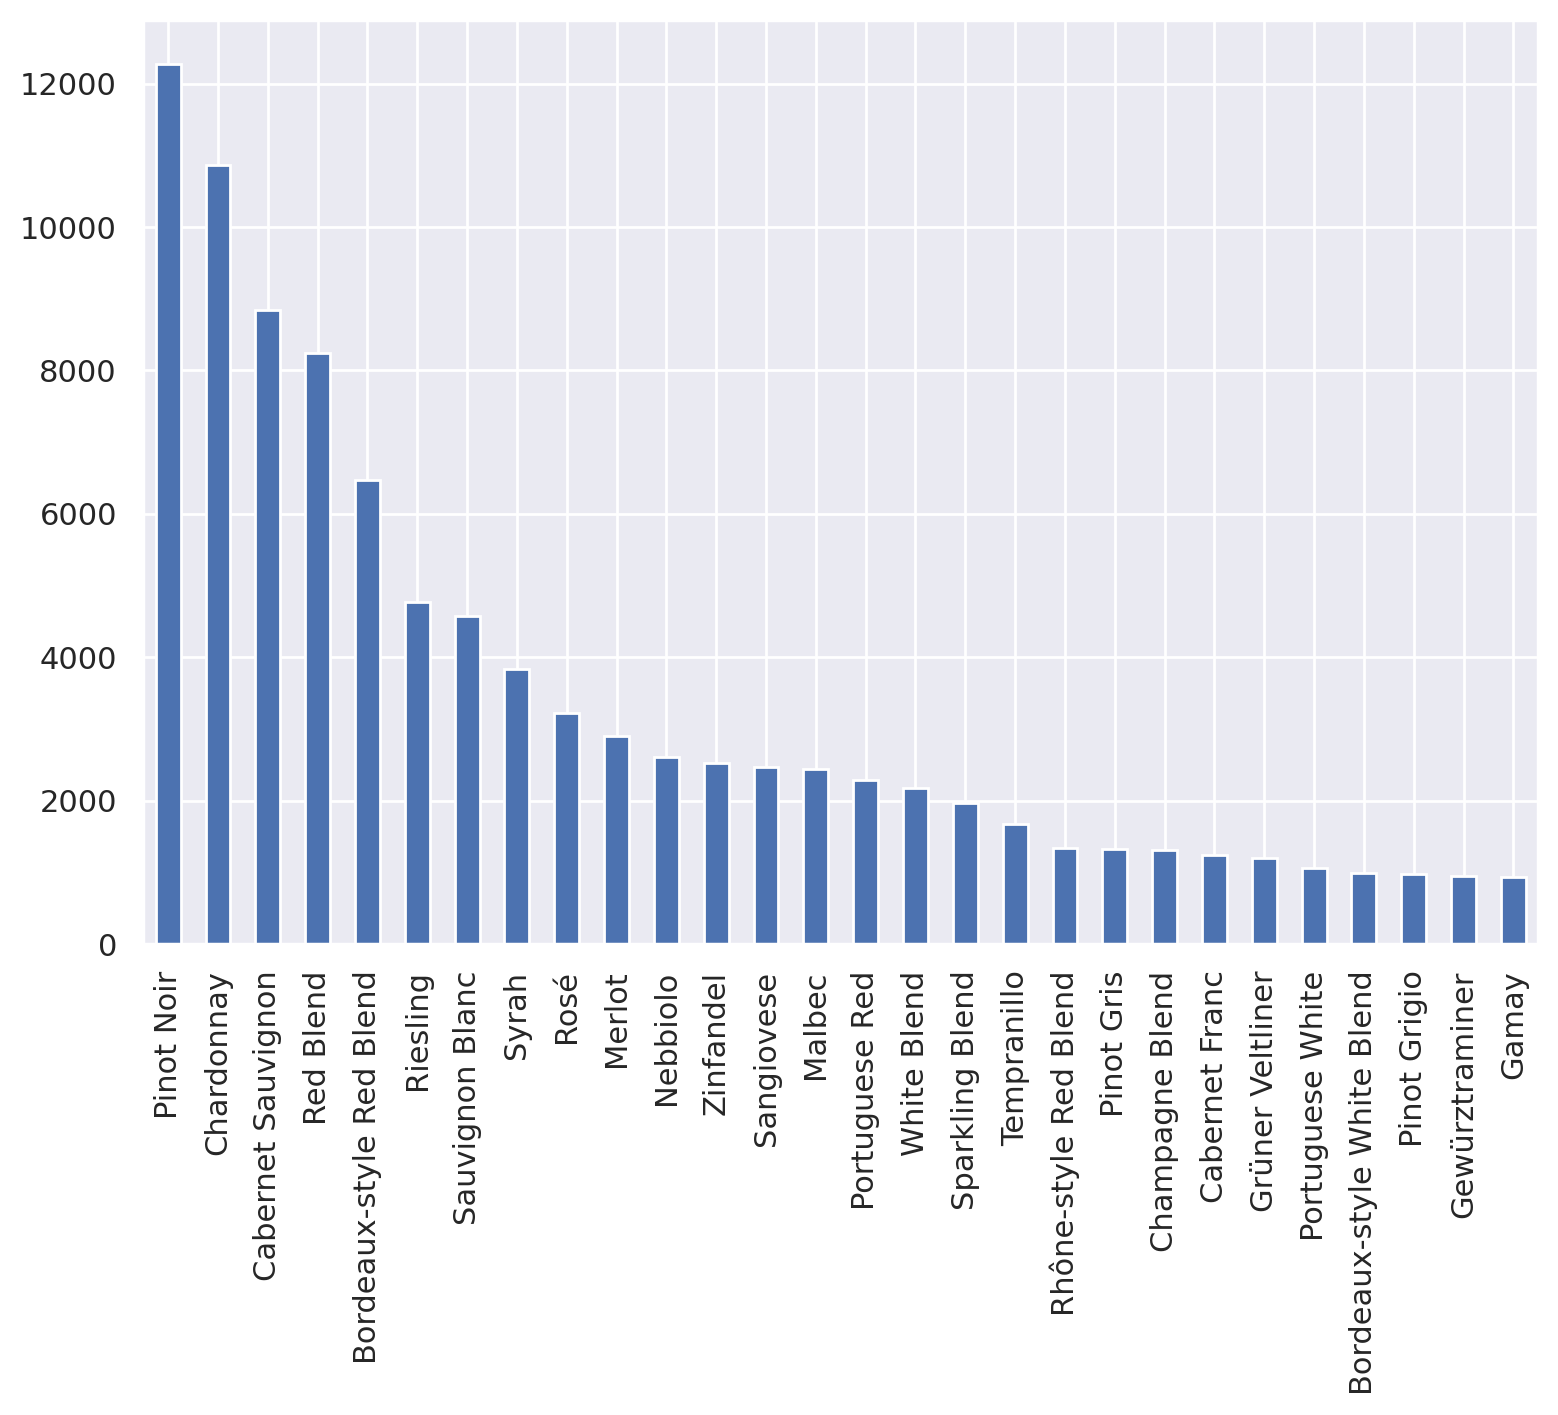

In [ ]:
df['variety'].value_counts().plot(kind='bar')

**Data imbalance 🙄**

In [ ]:
max_variety = df['variety'].value_counts().idxmax()
max_variety_country = df[df['variety'] == max_variety]['country'].value_counts().idxmax()
print(f'The country where the variety {max_variety} most occurs is: {max_variety_country}')

The country where the variety Pinot Noir most occurs is: US


In [ ]:
max_variety_province = df[df['variety'] == max_variety]['province'].value_counts().idxmax()
print(f'The province where the variety {max_variety} most occurs is: {max_variety_province}')

The province where the variety Pinot Noir most occurs is: California


### **Country**

In [ ]:
df = df.dropna(subset=['country'])

In [ ]:
df['country'].nunique()

40

<Axes: >

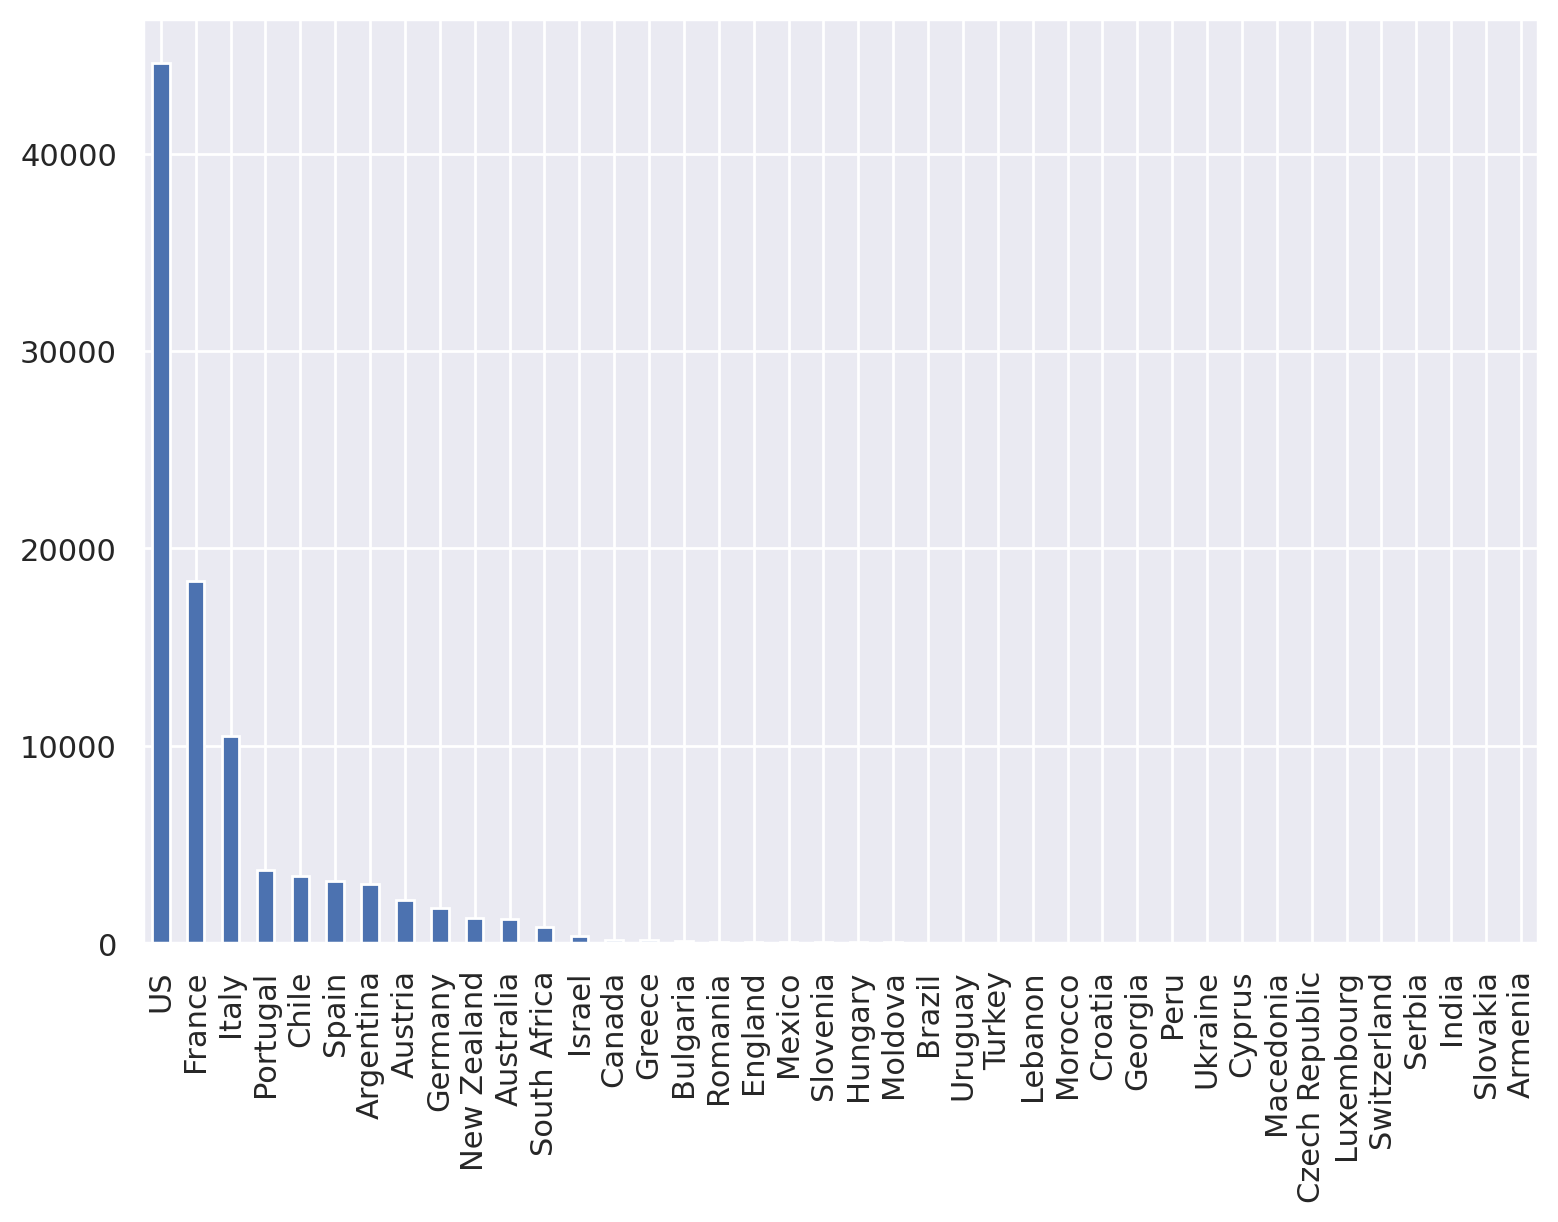

In [ ]:
df['country'].value_counts().plot(kind='bar')

In [ ]:
df['country'].value_counts()

US                44574
France            18368
Italy             10484
Portugal           3730
Chile              3398
Spain              3157
Argentina          2986
Austria            2194
Germany            1792
New Zealand        1259
Australia          1214
South Africa        842
Israel              368
Canada              185
Greece              182
Bulgaria            109
Romania              84
England              63
Mexico               53
Slovenia             52
Hungary              42
Moldova              41
Brazil               36
Uruguay              35
Turkey               33
Lebanon              30
Morocco              20
Croatia              16
Georgia              15
Peru                 12
Ukraine              12
Cyprus                7
Macedonia             5
Czech Republic        4
Luxembourg            4
Switzerland           4
Serbia                4
India                 2
Slovakia              1
Armenia               1
Name: country, dtype: int64

In [ ]:
for c in df['country'].unique():
  print('{}: '.format(c),(df['country'] == c).sum())

Italy:  10484
Portugal:  3730
US:  44574
France:  18368
Germany:  1792
Argentina:  2986
Chile:  3398
Australia:  1214
Austria:  2194
South Africa:  842
New Zealand:  1259
Israel:  368
Spain:  3157
Romania:  84
Greece:  182
Mexico:  53
Hungary:  42
Slovenia:  52
Luxembourg:  4
England:  63
Uruguay:  35
Lebanon:  30
Canada:  185
Brazil:  36
Morocco:  20
Czech Republic:  4
Bulgaria:  109
Cyprus:  7
Turkey:  33
Moldova:  41
Croatia:  16
Peru:  12
Georgia:  15
Ukraine:  12
Switzerland:  4
Slovakia:  1
Serbia:  4
India:  2
Macedonia:  5
Armenia:  1


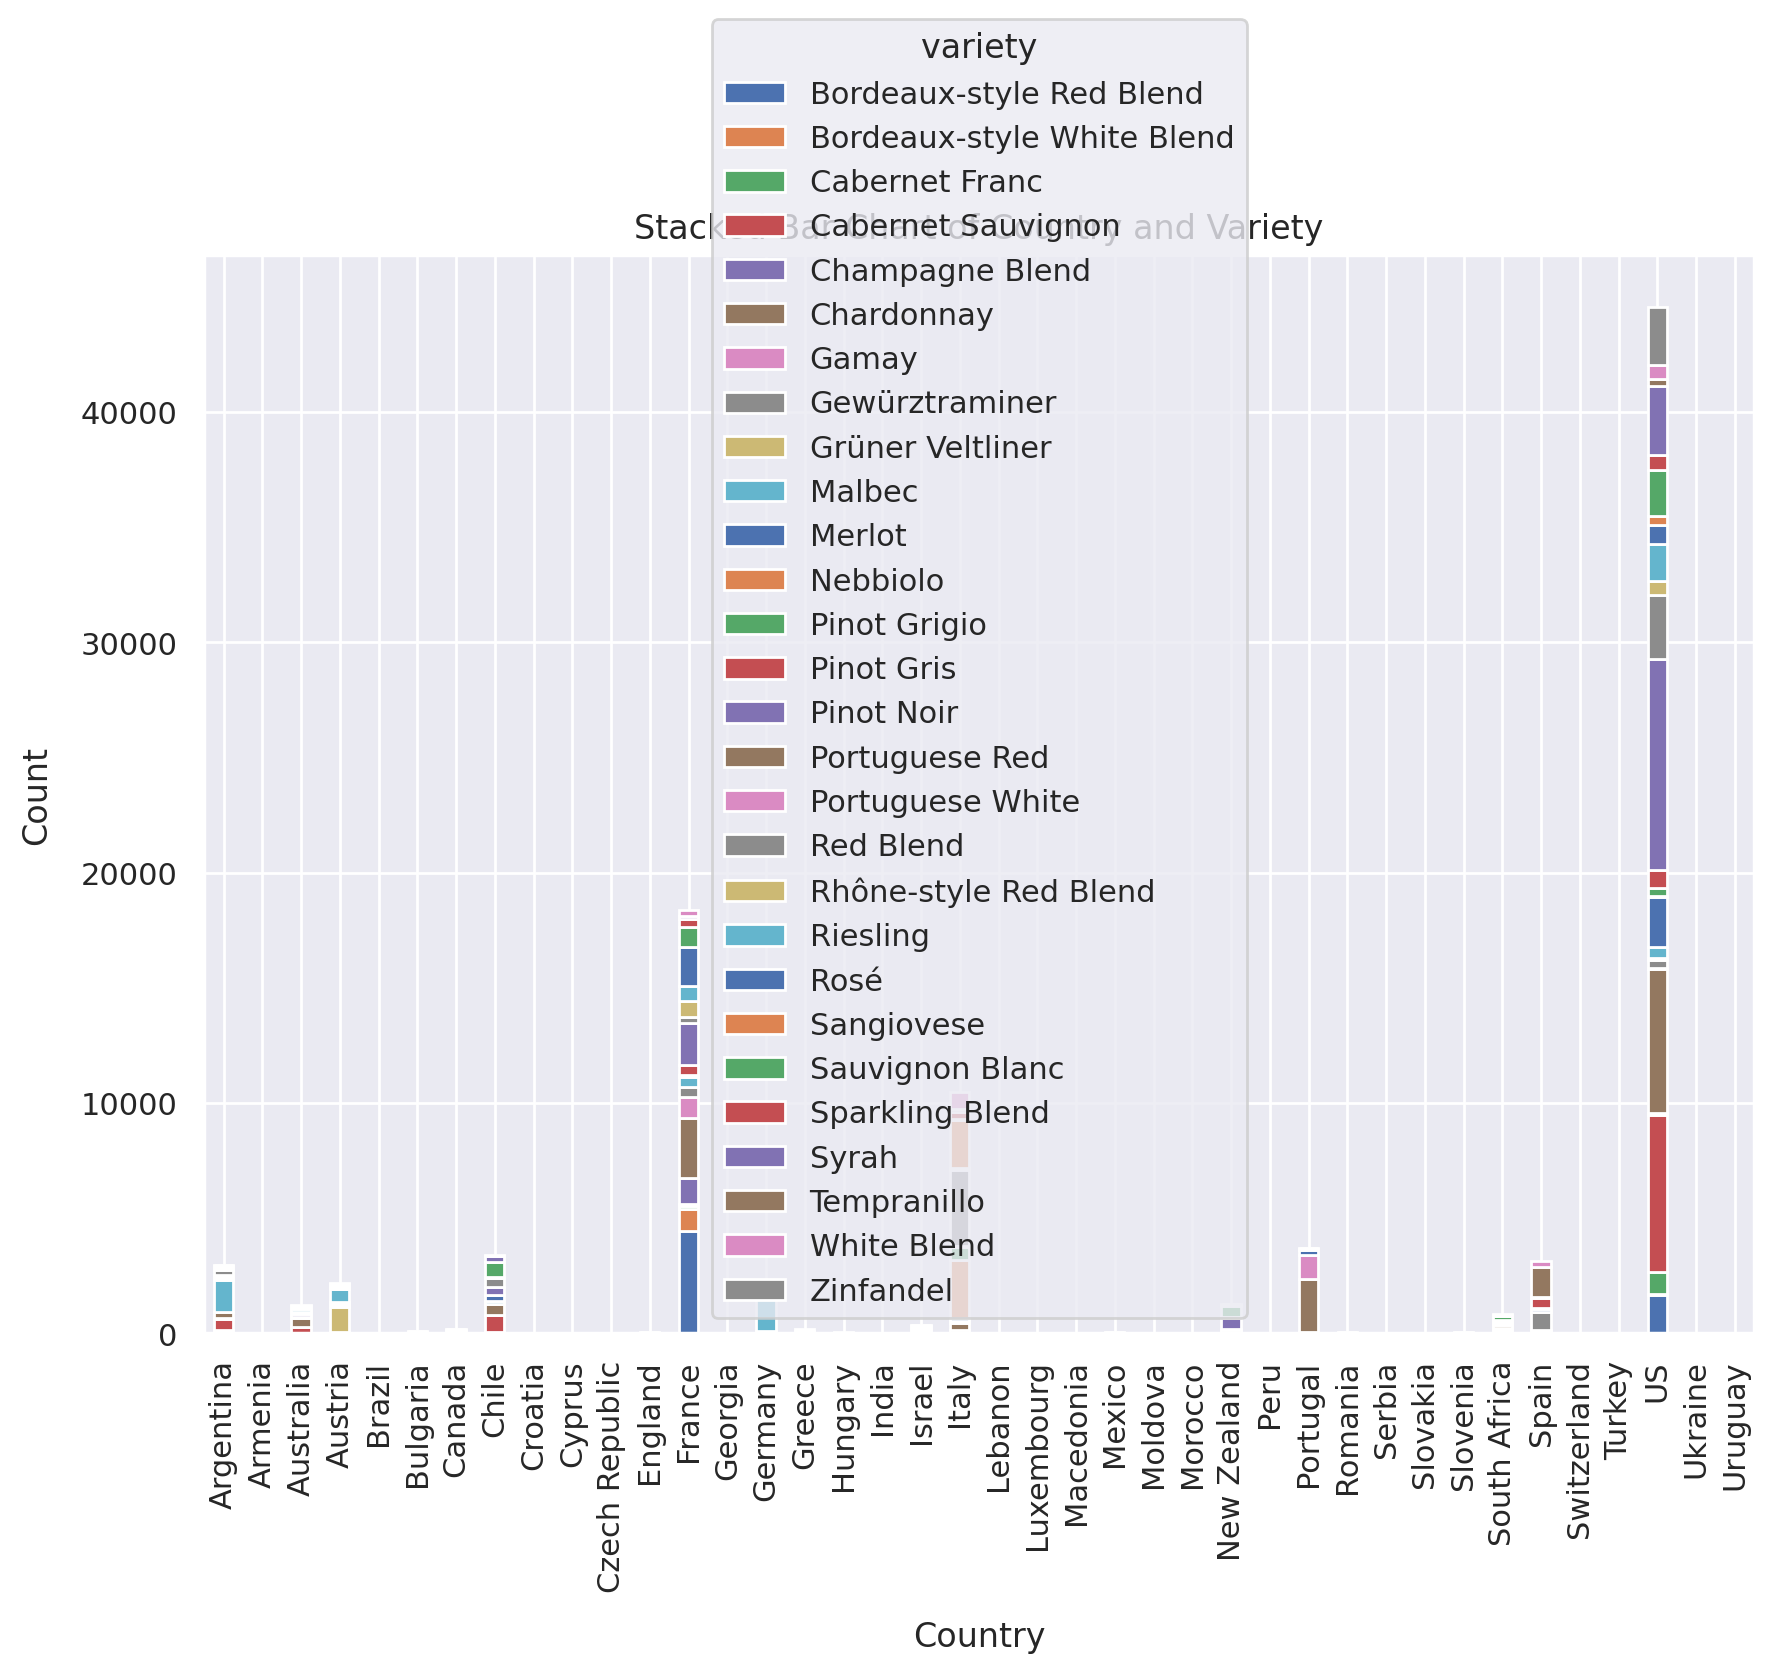

In [ ]:
ct = pd.crosstab(df['country'], df['variety'])

# Plot the stacked bar chart
ct.plot(kind='bar', stacked=True, figsize=(10, 7))

# Add labels and title
plt.xlabel('Country')
plt.ylabel('Count')
plt.title('Stacked Bar Chart of Country and Variety')

# Display the plot
plt.show()

In [ ]:
# Assuming your data is stored in a DataFrame called df
# Create a cross-tabulation table
ct = pd.crosstab(df['country'], df['variety'])

# Display the cross-tabulation table
print(ct)

variety         Bordeaux-style Red Blend  Bordeaux-style White Blend  \
country                                                                
Argentina                             82                           1   
Armenia                                0                           0   
Australia                             28                           0   
Austria                                2                           0   
Brazil                                 2                           0   
Bulgaria                               2                           0   
Canada                                13                           0   
Chile                                 37                           0   
Croatia                                1                           0   
Cyprus                                 0                           0   
Czech Republic                         0                           0   
England                                0                        

These countries produce the following varieties in significantly large amounts: <br>
**US**: Cabernet Franc, Cabernet Sauvignon, Sauvignon Blanc, Sparkling Blend, Syrah, Zinfandel<br>
**France**: Bordeaux-style Red Blend, Bordeaux-style White Blend, Champagne Blend, Gamay, Gewürztraminer, Rosé<br>
**Austria**: Grüner Veltliner<br>
**Spain**: Tempranillo<br>
**Italy**: Sangiovese  

Thus France and US produces the highest varieties of wine.

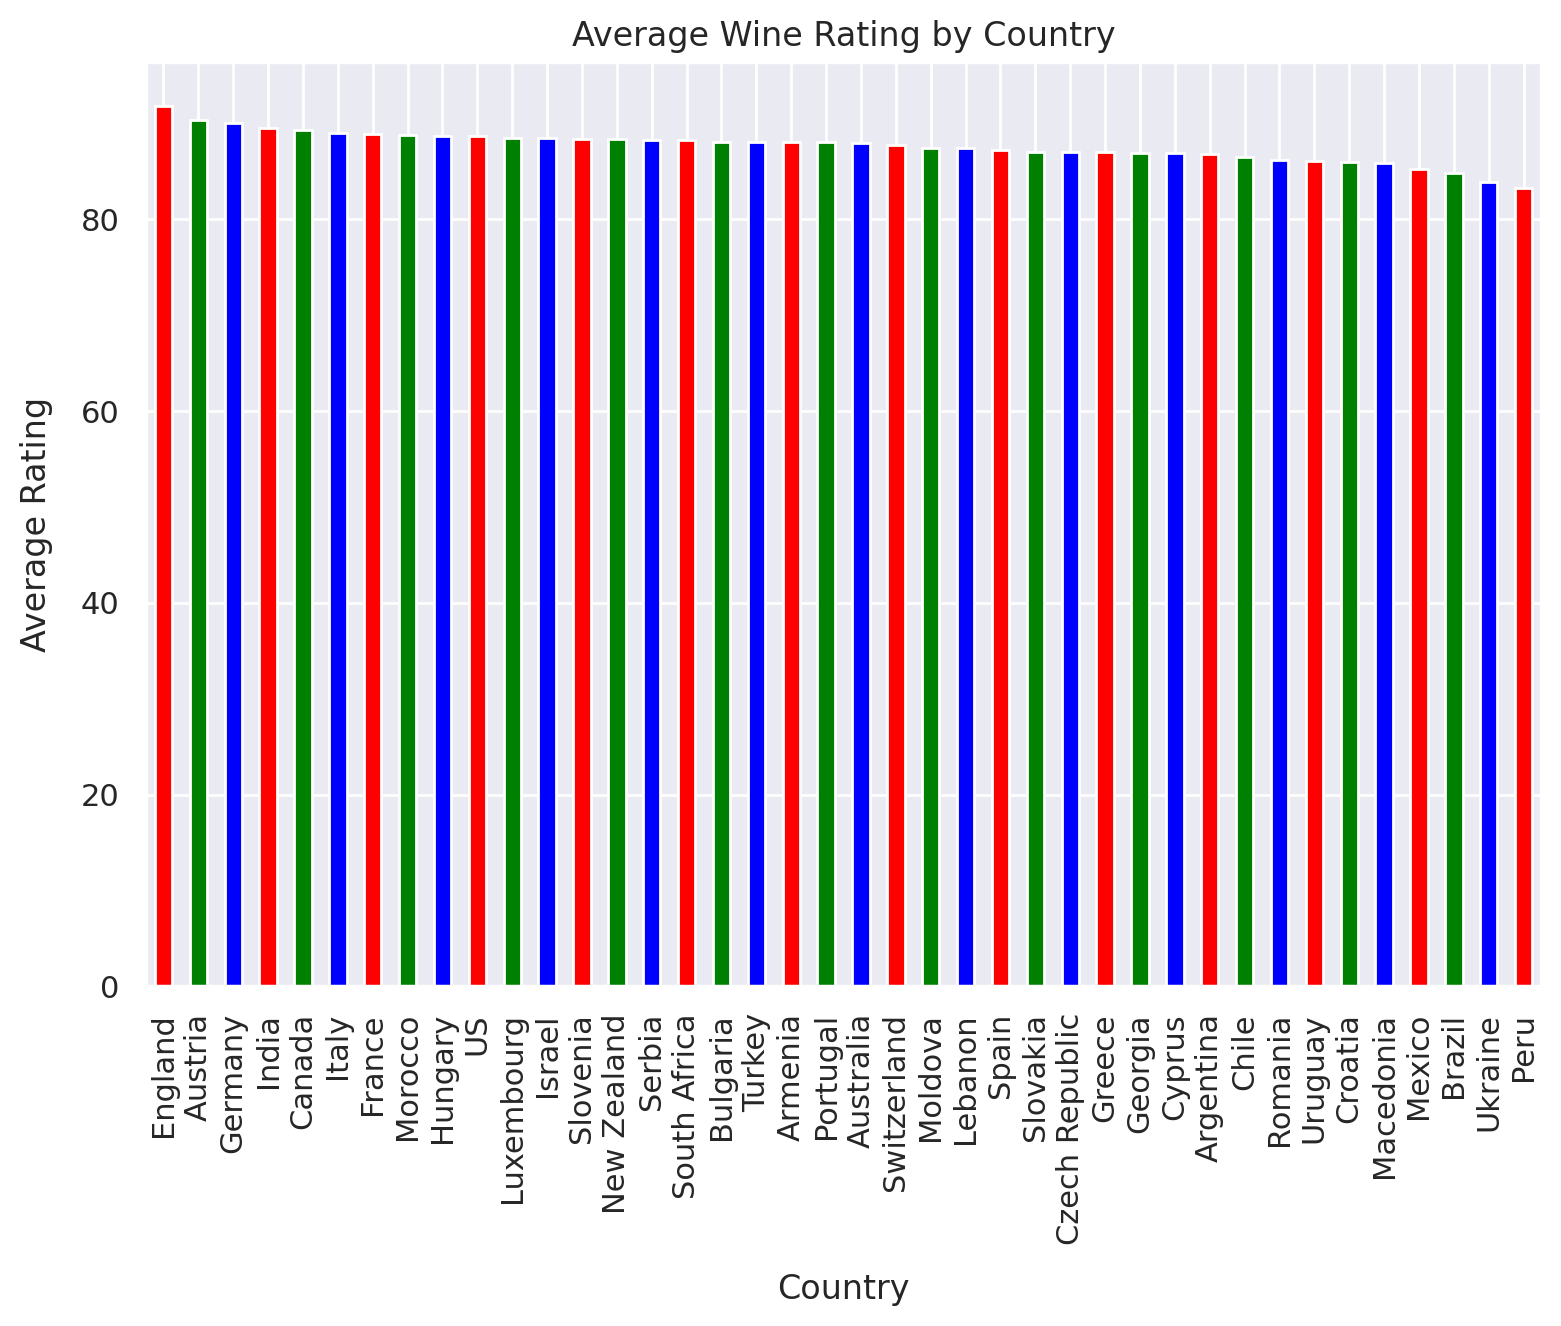

In [ ]:
# Group the data by country and calculate the mean of the points column
country_avg_rating = df.groupby('country')['points'].mean()

# Sort the values in descending order
country_avg_rating = country_avg_rating.sort_values(ascending=False)

# Plot the data as a line chart
country_avg_rating.plot(kind='bar',color=['red', 'green', 'blue'])
plt.title('Average Wine Rating by Country')
plt.xlabel('Country')
plt.ylabel('Average Rating')
plt.show()

<ipython-input-29-13e36a006fdd>:8: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='price', y='country', data=top_10, palette='husl', ax=ax, ci=None)


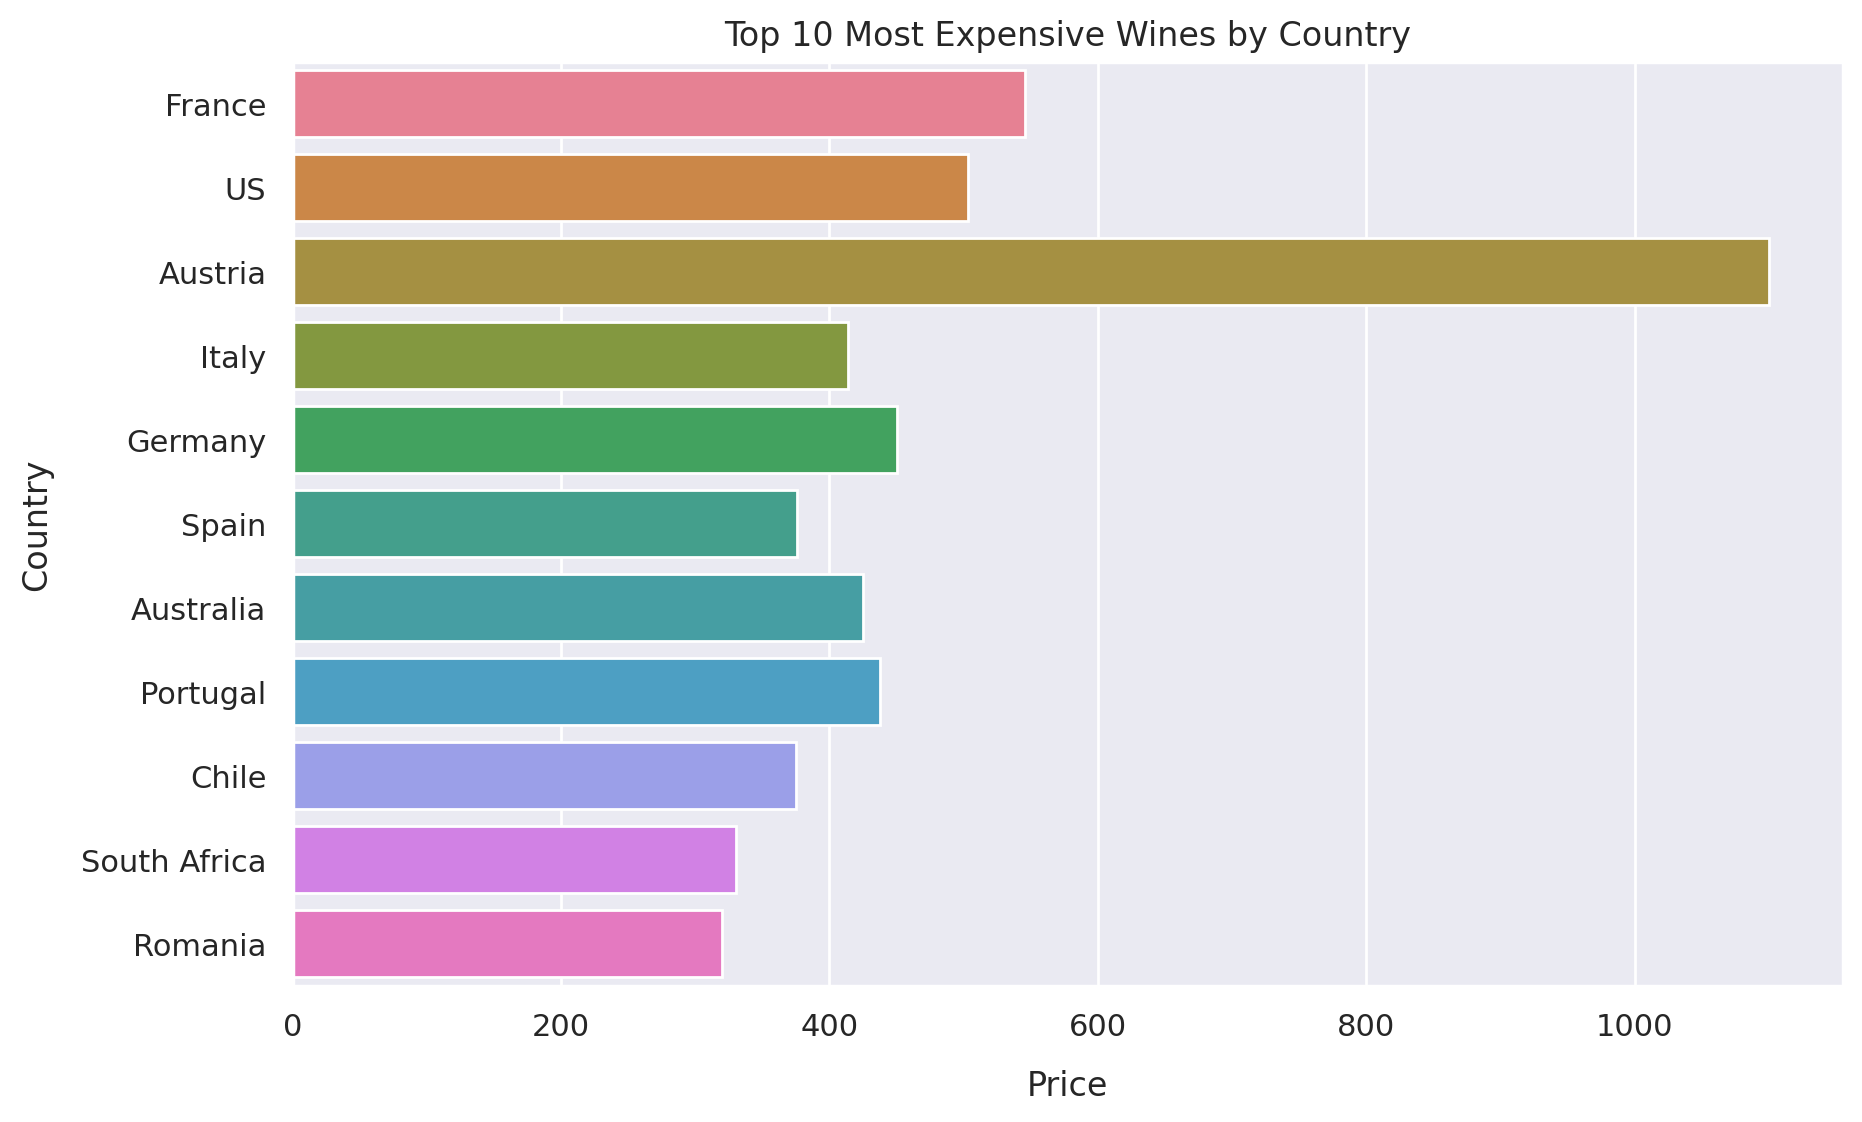

In [ ]:
# Create a DataFrame containing the 10 most expensive wines
top_10 = df.nlargest(300, 'price')

# Create a figure
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the data using a bar chart
sns.barplot(x='price', y='country', data=top_10, palette='husl', ax=ax, ci=None)

# Set the title and axis labels
ax.set_title('Top 10 Most Expensive Wines by Country')
ax.set_xlabel('Price')
ax.set_ylabel('Country')

# Show the plot
plt.show()

<ipython-input-61-8c1a913a9917>:8: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='price', y='country', data=top_10, palette='husl', ax=ax, ci=None)


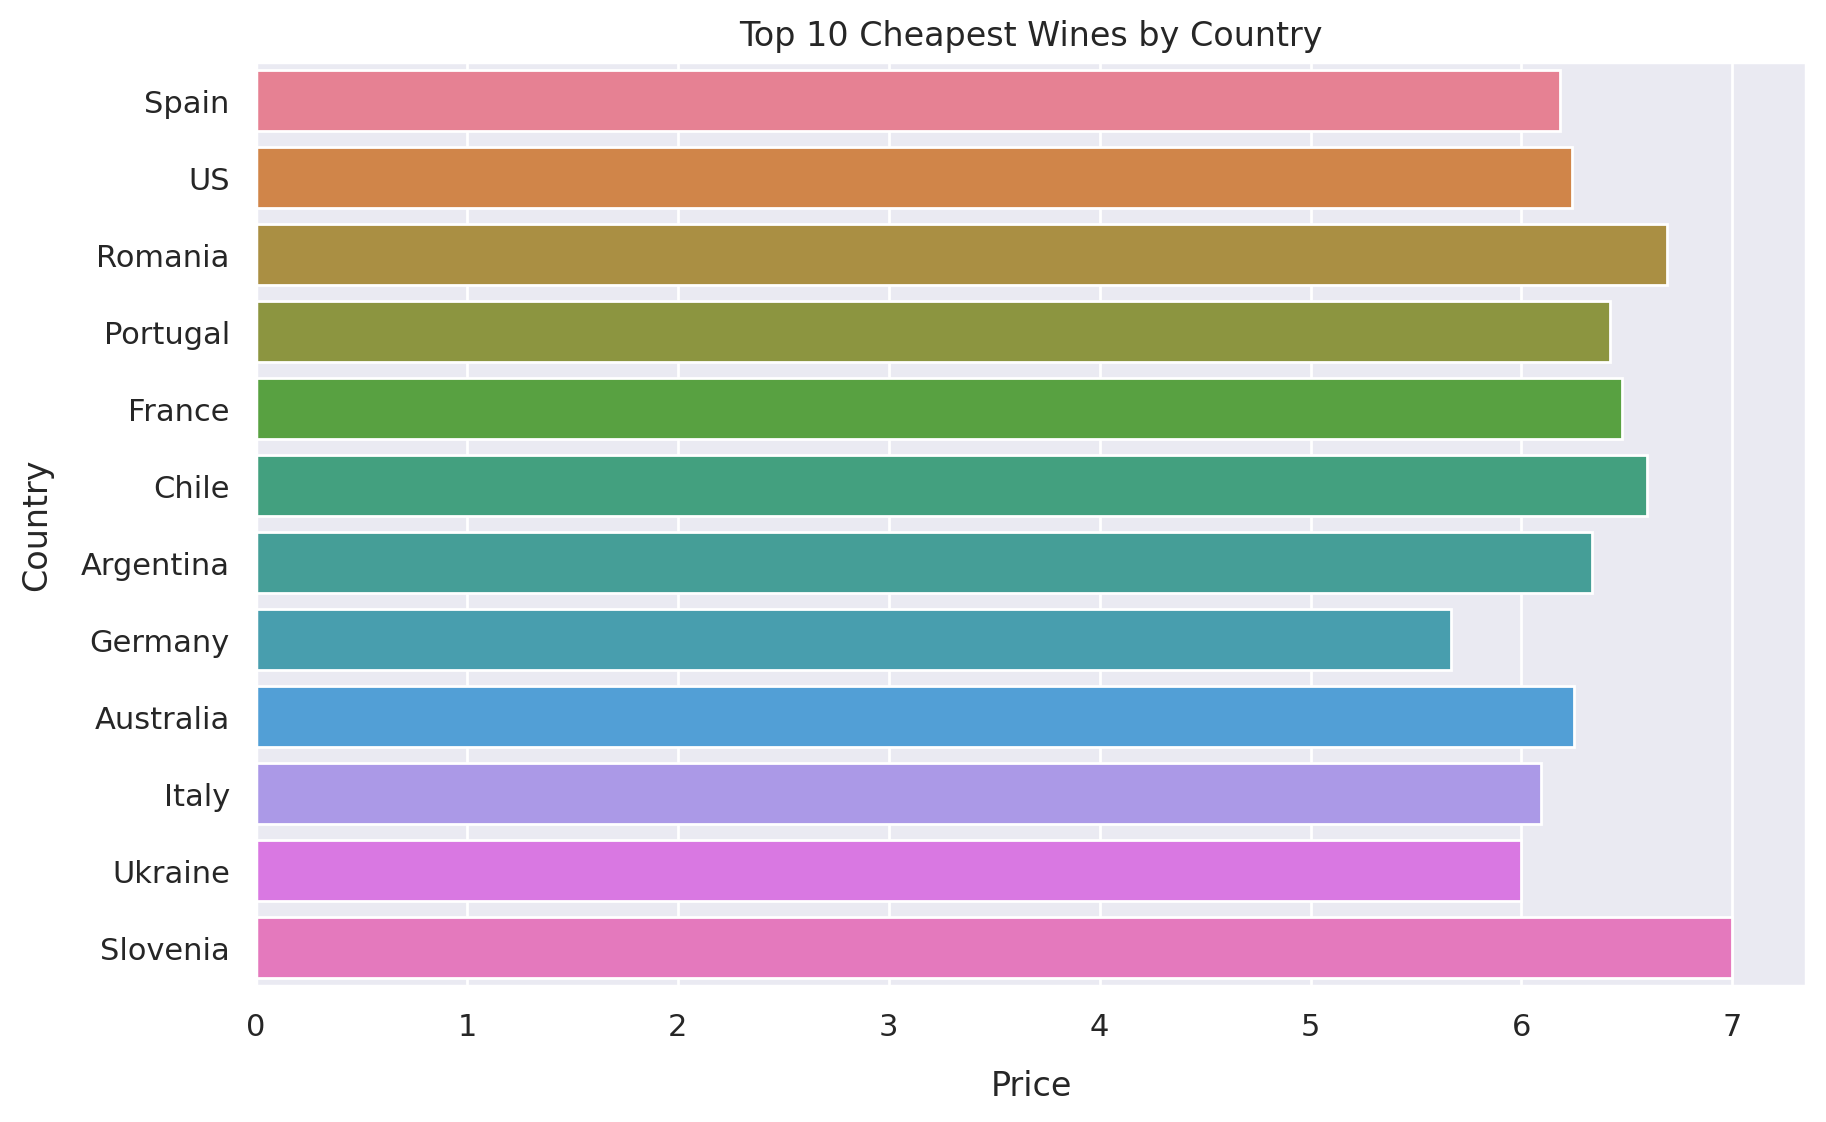

In [ ]:
# Create a DataFrame containing the 10 most expensive wines
top_10 = df.nsmallest(300, 'price')

# Create a figure
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the data using a bar chart
sns.barplot(x='price', y='country', data=top_10, palette='husl', ax=ax, ci=None)

# Set the title and axis labels
ax.set_title('Top 10 Cheapest Wines by Country')
ax.set_xlabel('Price')
ax.set_ylabel('Country')

# Show the plot
plt.show()

Most expensive wines are from France, Austria and US. Affordable wines are sold by Portugal, Argentina, Spain, Slovenia, US and Romania.<br>
Thus US wines gives an option of expensive and affordable wines thus making them the favourite of reviewers.

In [ ]:
max_price_row = df.loc[df['price'].idxmax()]

# Print the country of the row with the maximum price
print(f"Country with maximum price: ")
print(max_price_row[['country', 'points', 'price', 'province', 'region_1', 'winery', 'variety']])

min_price_row = df.loc[df['price'].idxmin()]

# Print the country of the row with the minprice
print(f"\n\nCountry with minimum price: {min_price_row['country']}")
print(min_price_row[['country', 'points', 'price', 'province', 'region_1', 'winery', 'variety']])

Country with maximum price: 
country                       France
points                            88
price                         3300.0
province                    Bordeaux
region_1                       Médoc
winery      Château les Ormes Sorbet
variety     Bordeaux-style Red Blend
Name: 63706, dtype: object


Country with minimum price: Spain
country                             Spain
points                                 85
price                                 4.0
province                    Central Spain
region_1    Vino de la Tierra de Castilla
winery                        Felix Solis
variety                             Syrah
Name: 1565, dtype: object


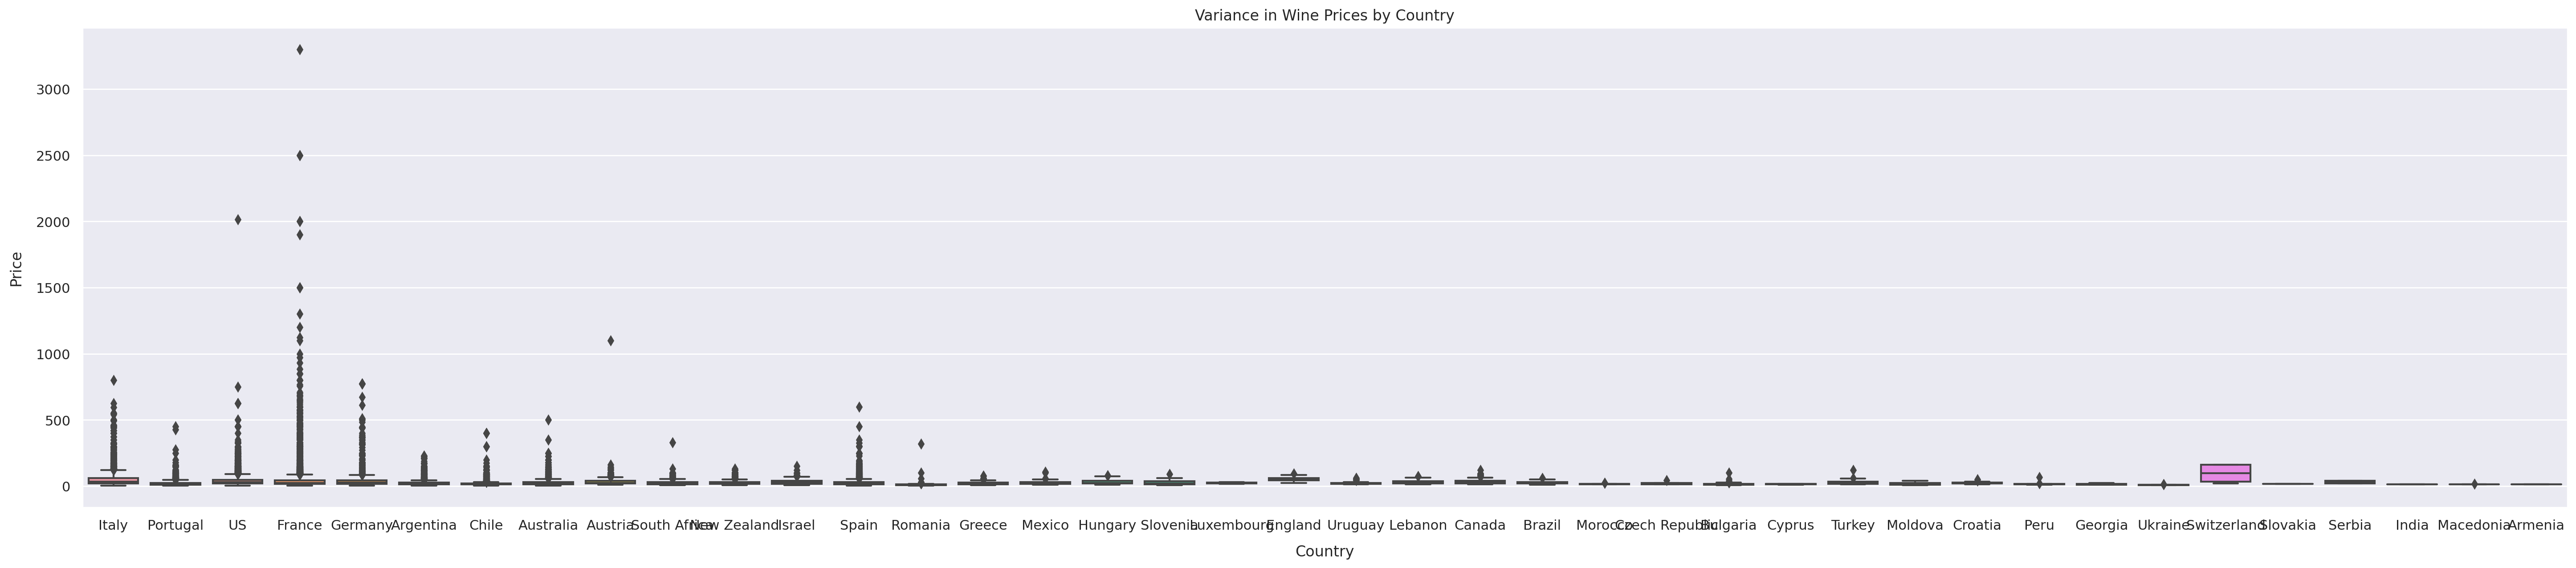

In [ ]:
plt.figure(figsize=(36, 7))
sns.boxplot(x='country', y='price', data=df)
plt.title('Variance in Wine Prices by Country')
plt.xlabel('Country')
plt.ylabel('Price')
plt.show()

US, Spain and France have the largest collection of wines in widest price ranges.


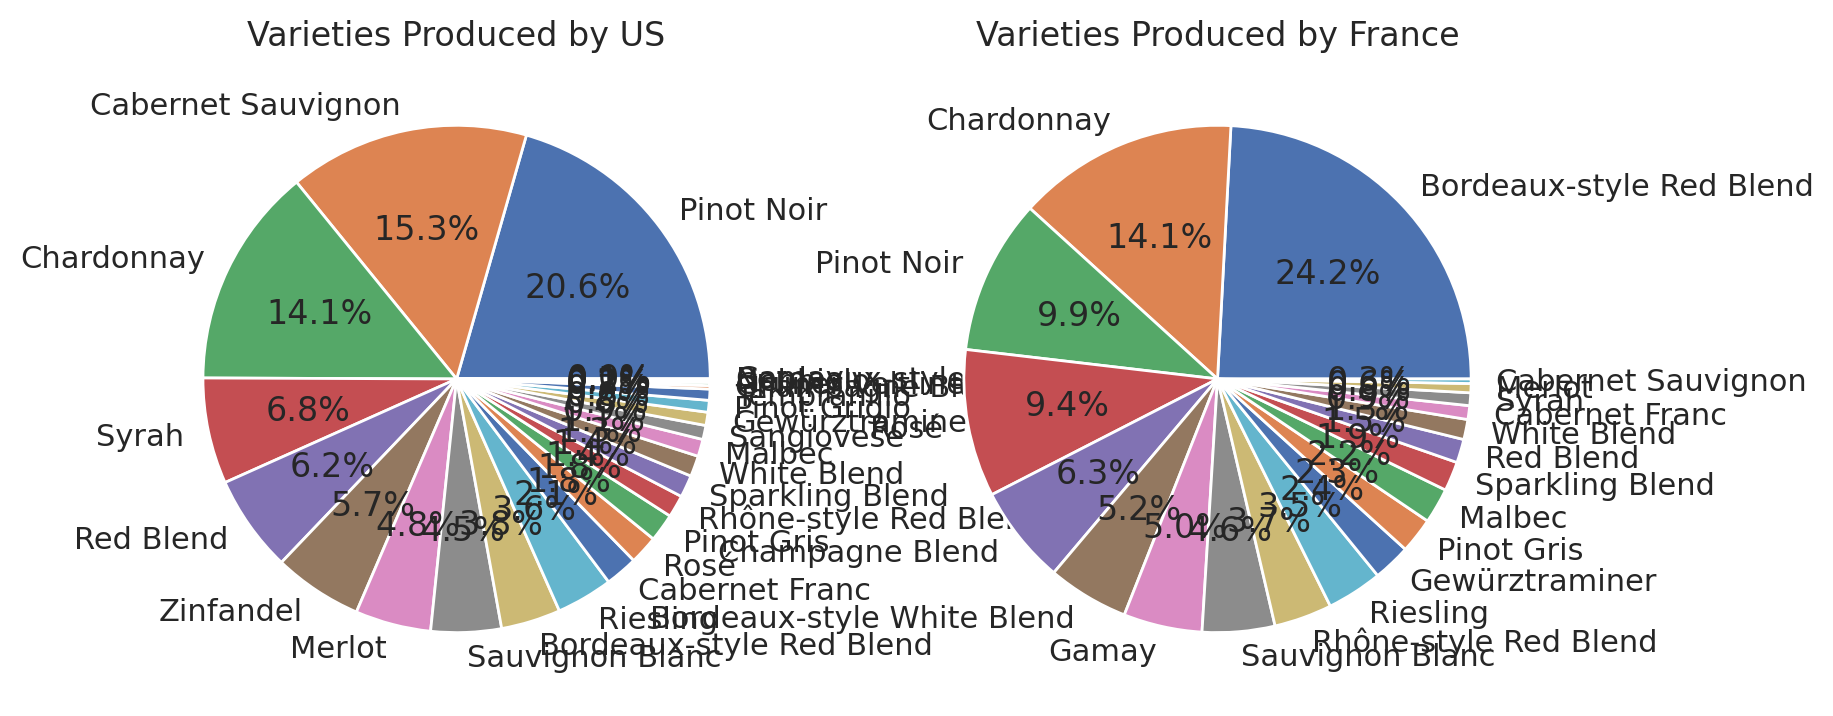

In [ ]:
us_df = df[df['country'] == 'US']
us_varieties = us_df['variety'].value_counts()
france_df = df[df['country'] == 'France']
france_varieties = france_df['variety'].value_counts()

fig, ax = plt.subplots(1, 2)
ax[0].pie(us_varieties, labels=us_varieties.index, autopct='%1.1f%%')
ax[0].set_title('Varieties Produced by US')
ax[1].pie(france_varieties, labels=france_varieties.index, autopct='%1.1f%%')
ax[1].set_title('Varieties Produced by France')
plt.show()

## **Price**

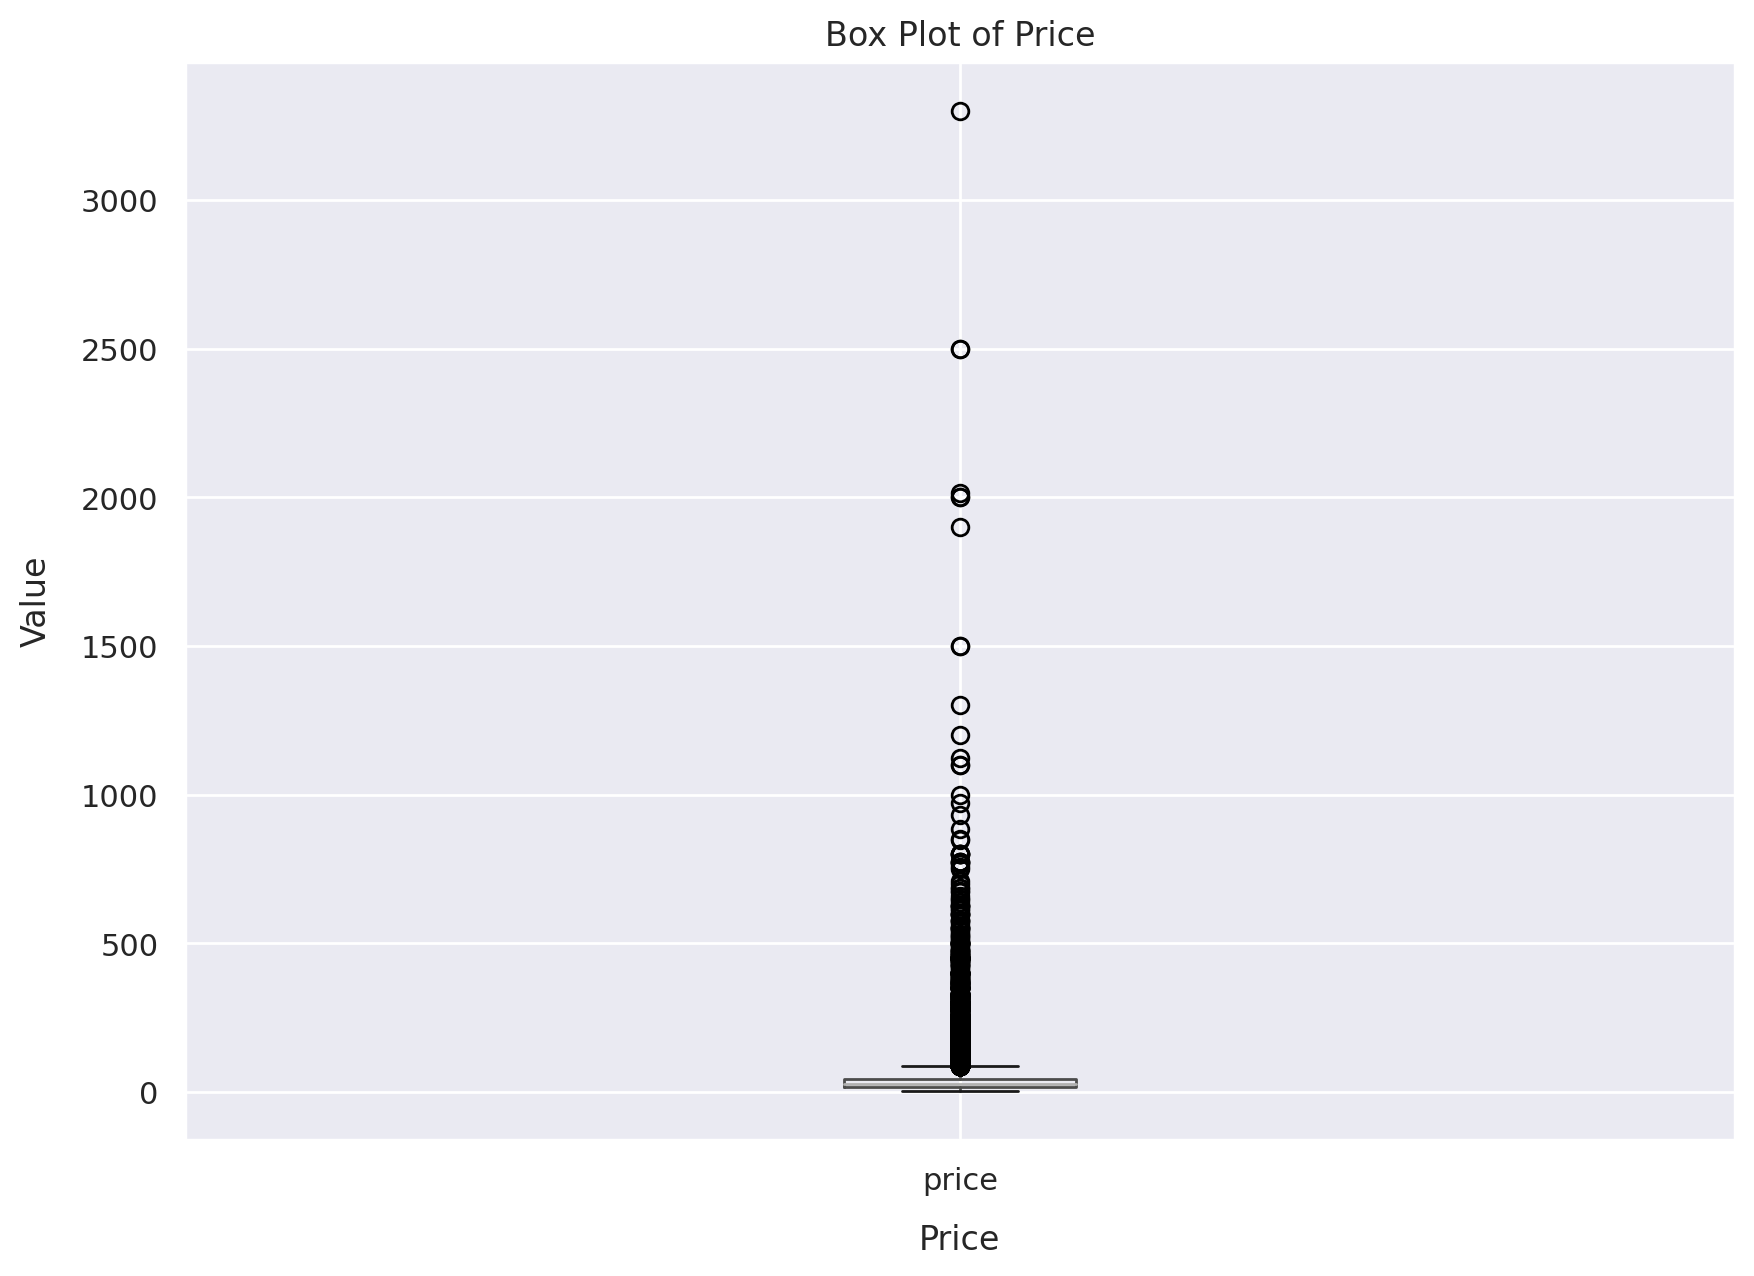

In [ ]:
df.boxplot(column='price', figsize=(10, 7))

# Add labels and title
plt.xlabel('Price')
plt.ylabel('Value')
plt.title('Box Plot of Price')

# Display the plot
plt.show()

Most of the wine are in the price range below 700.


<ipython-input-35-77d0c729ac0d>:8: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x='price', y='points', data=df, palette=green_palette, ax=ax)


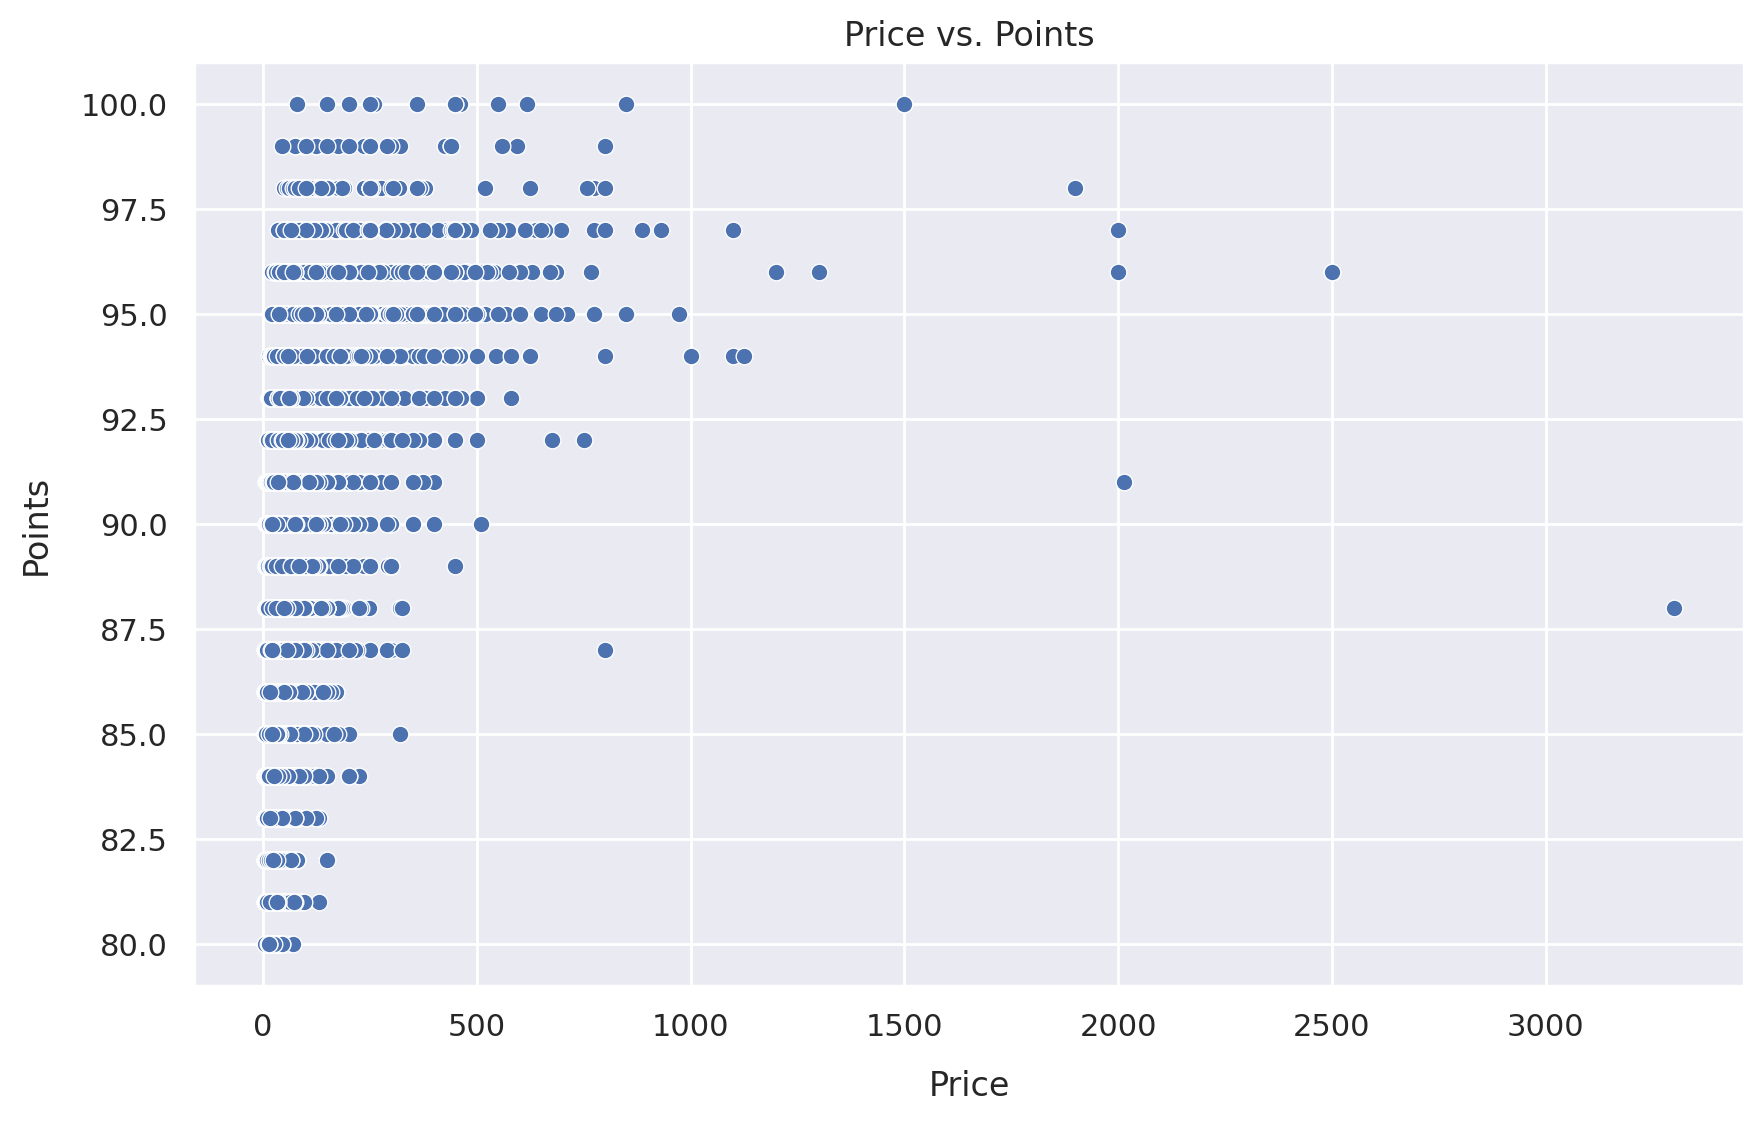

In [ ]:
# Create a figure
fig, ax = plt.subplots(figsize=(10, 6))

# Define a green color palette
green_palette = sns.light_palette("green", as_cmap=True)

# Plot the data using a scatter plot with a green color palette
sns.scatterplot(x='price', y='points', data=df, palette=green_palette, ax=ax)

# Set the title and axis labels
ax.set_title('Price vs. Points')
ax.set_xlabel('Price')
ax.set_ylabel('Points')

# Show the plot
plt.show()

In [ ]:
df.corr()

<ipython-input-36-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


points     price
points  1.000000  0.415715
price   0.415715  1.000000

In [ ]:
df[df['price']<200].corr()

<ipython-input-37-90b5e524a991>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df[df['price']<200].corr()


points     price
points  1.000000  0.548949
price   0.548949  1.000000

In [ ]:
df['price'].sum()/ df.shape[0]

34.54136536083339

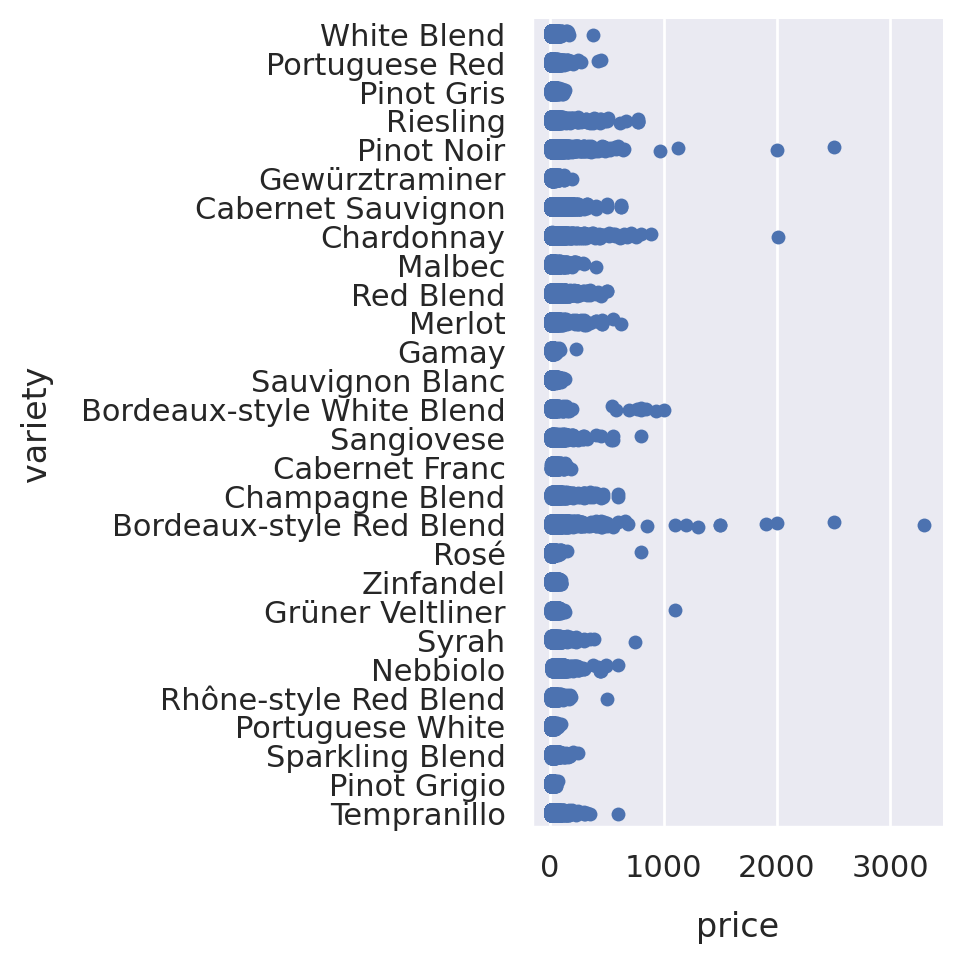

In [ ]:
import seaborn as sns
sns.catplot(x='price', y='variety', data=df)

Points given does not depend much on prices but better rated wines stand at higher price ranges.

## **Points**

<Axes: >

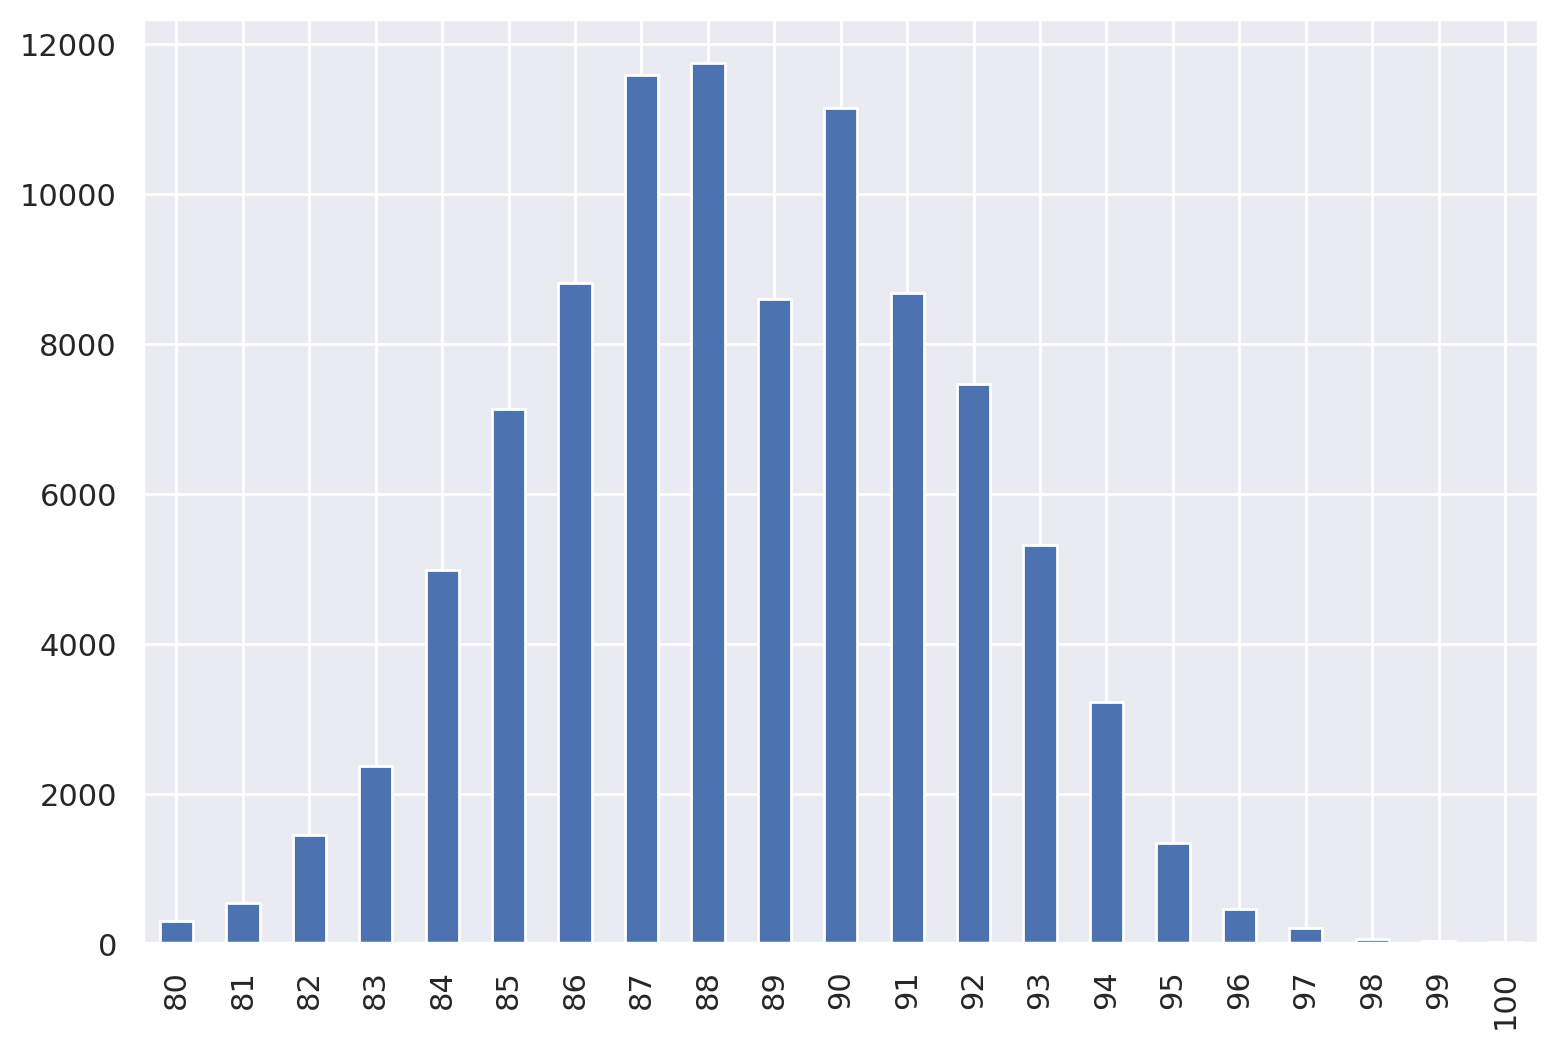

In [ ]:
df['points'].value_counts().sort_index().plot.bar()

**Most of reviews give a rating of 87-90**

<Axes: ylabel='Density'>

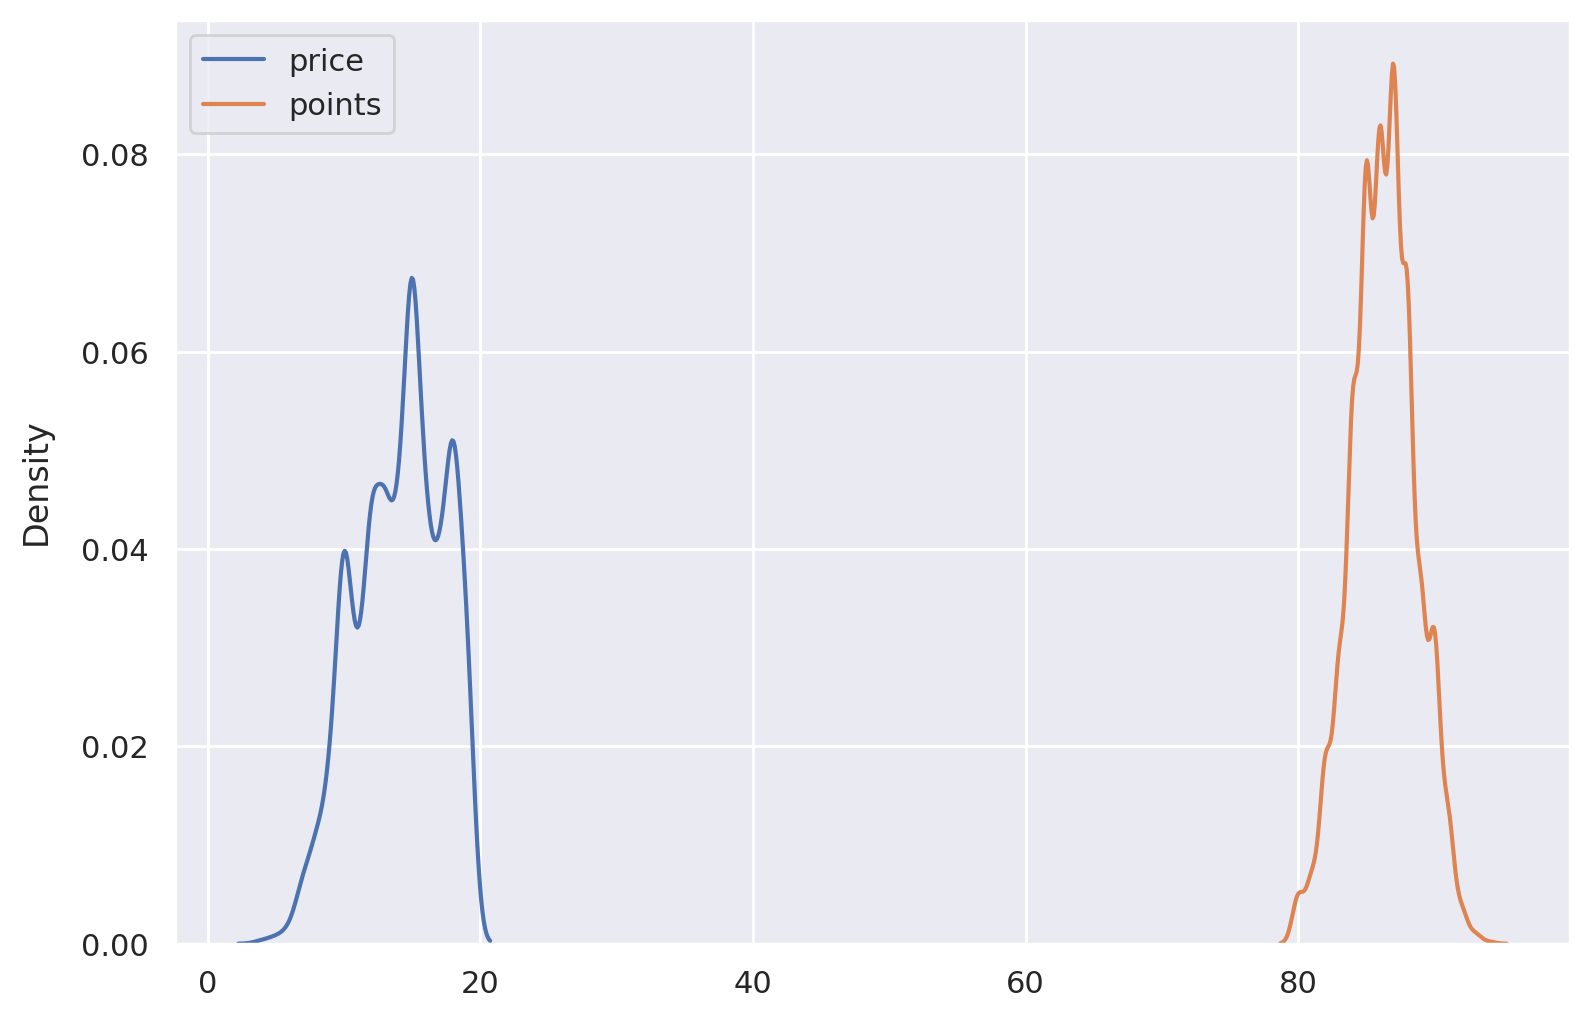

In [ ]:
# Plotted price and point value KDE Chart
sns.kdeplot(df[df['price'] < 20].loc[:, ['price', 'points']].dropna().sample(5000))

## **Description**

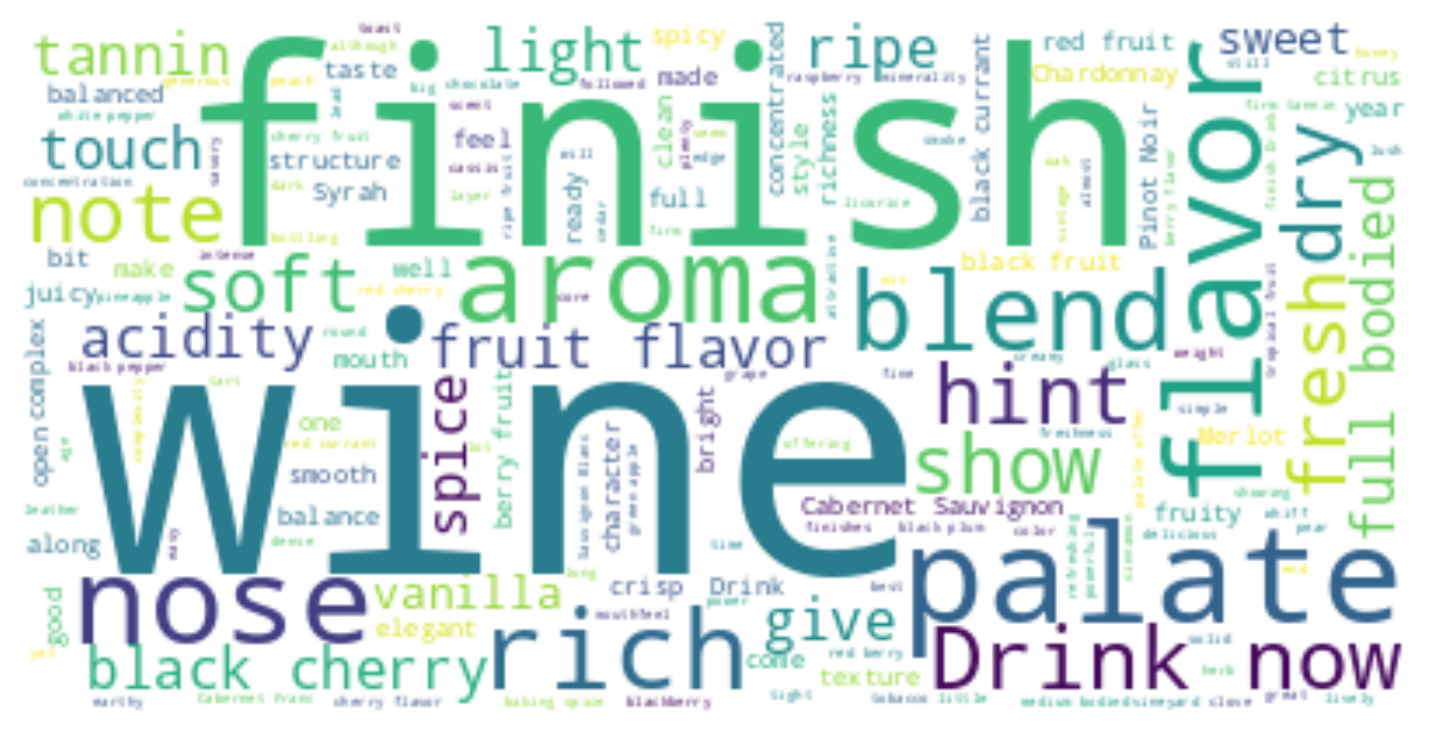

In [ ]:
from wordcloud import WordCloud


# Join all the review descriptions into one long string
text = ' '.join(df['review_description'].dropna().values)

# Create and generate a word cloud image
wordcloud = WordCloud(background_color='white').generate(text)

# Display the generated image
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

### **Province**

In [ ]:
print(df['province'].nunique())

370


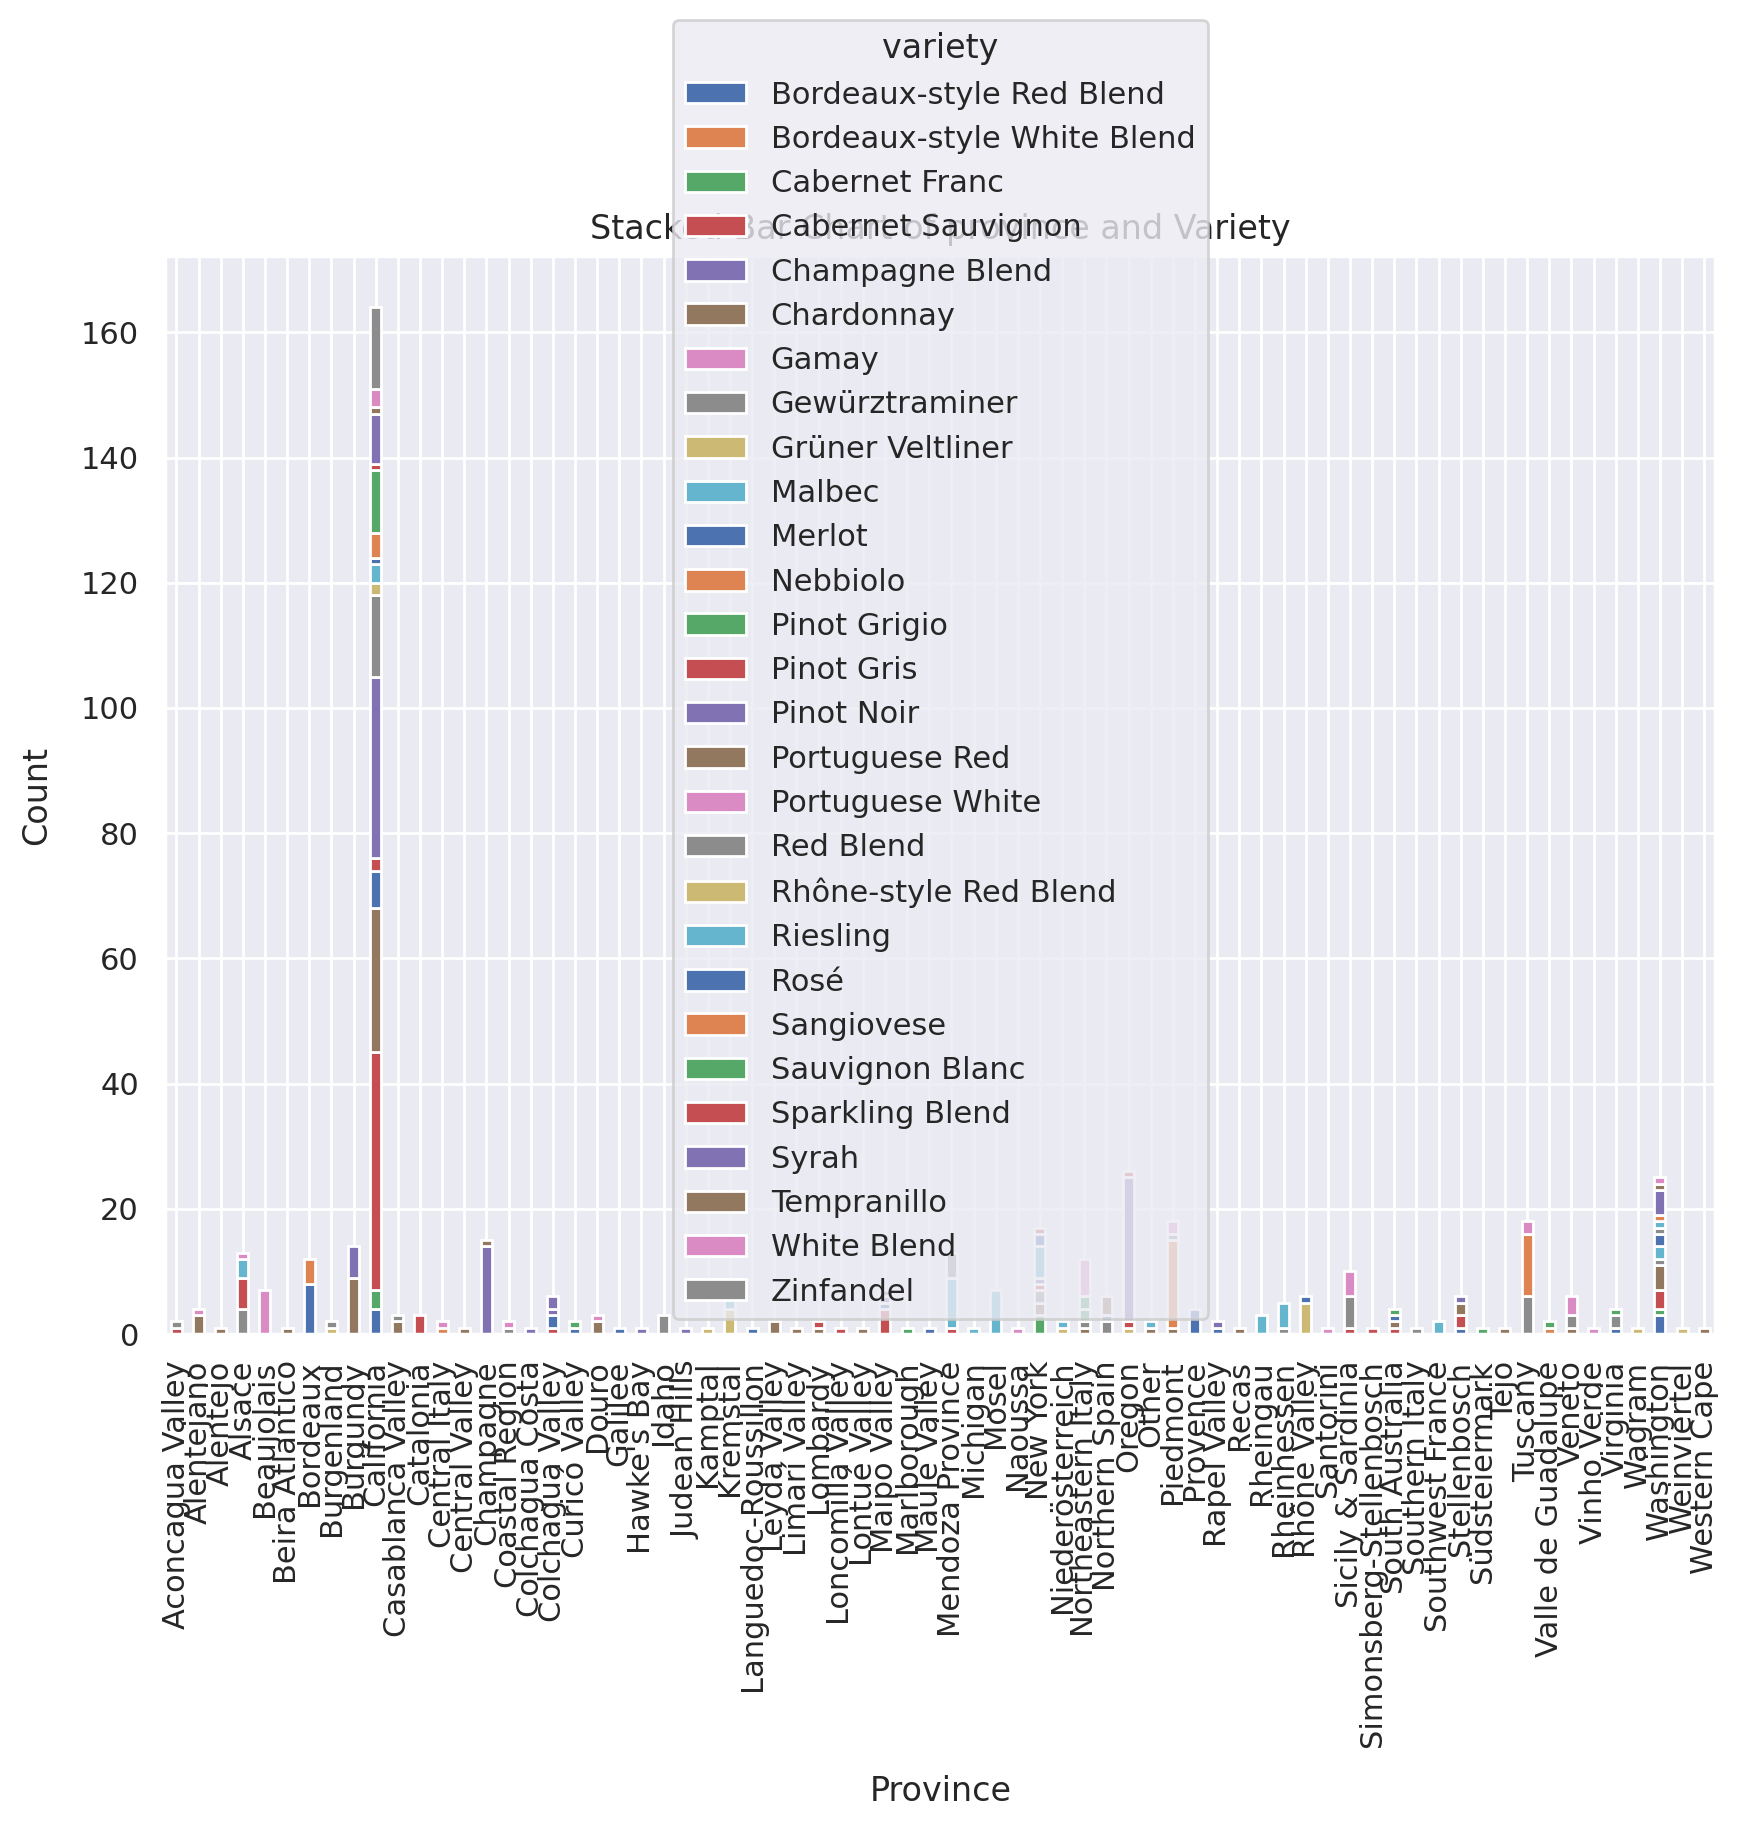

In [ ]:
ct = pd.crosstab(df['province'][:500], df['variety'])

# Plot the stacked bar chart
ct.plot(kind='bar', stacked=True, figsize=(10, 7))

# Add labels and title
plt.xlabel('Province')
plt.ylabel('Count')
plt.title('Stacked Bar Chart of province and Variety')

# Display the plot
plt.show()

**In US, California produces largest amount of sparkling red and Pinot Noir. California produces most number of varieties and has the most number of reviews.**

In [ ]:
df['province'].value_counts()

California    29787
Washington     6971
Bordeaux       5535
Oregon         4510
Tuscany        4361
              ...  
Malgas            1
Portugal          1
Armenia           1
Paardeberg        1
Neuchâtel         1
Name: province, Length: 370, dtype: int64

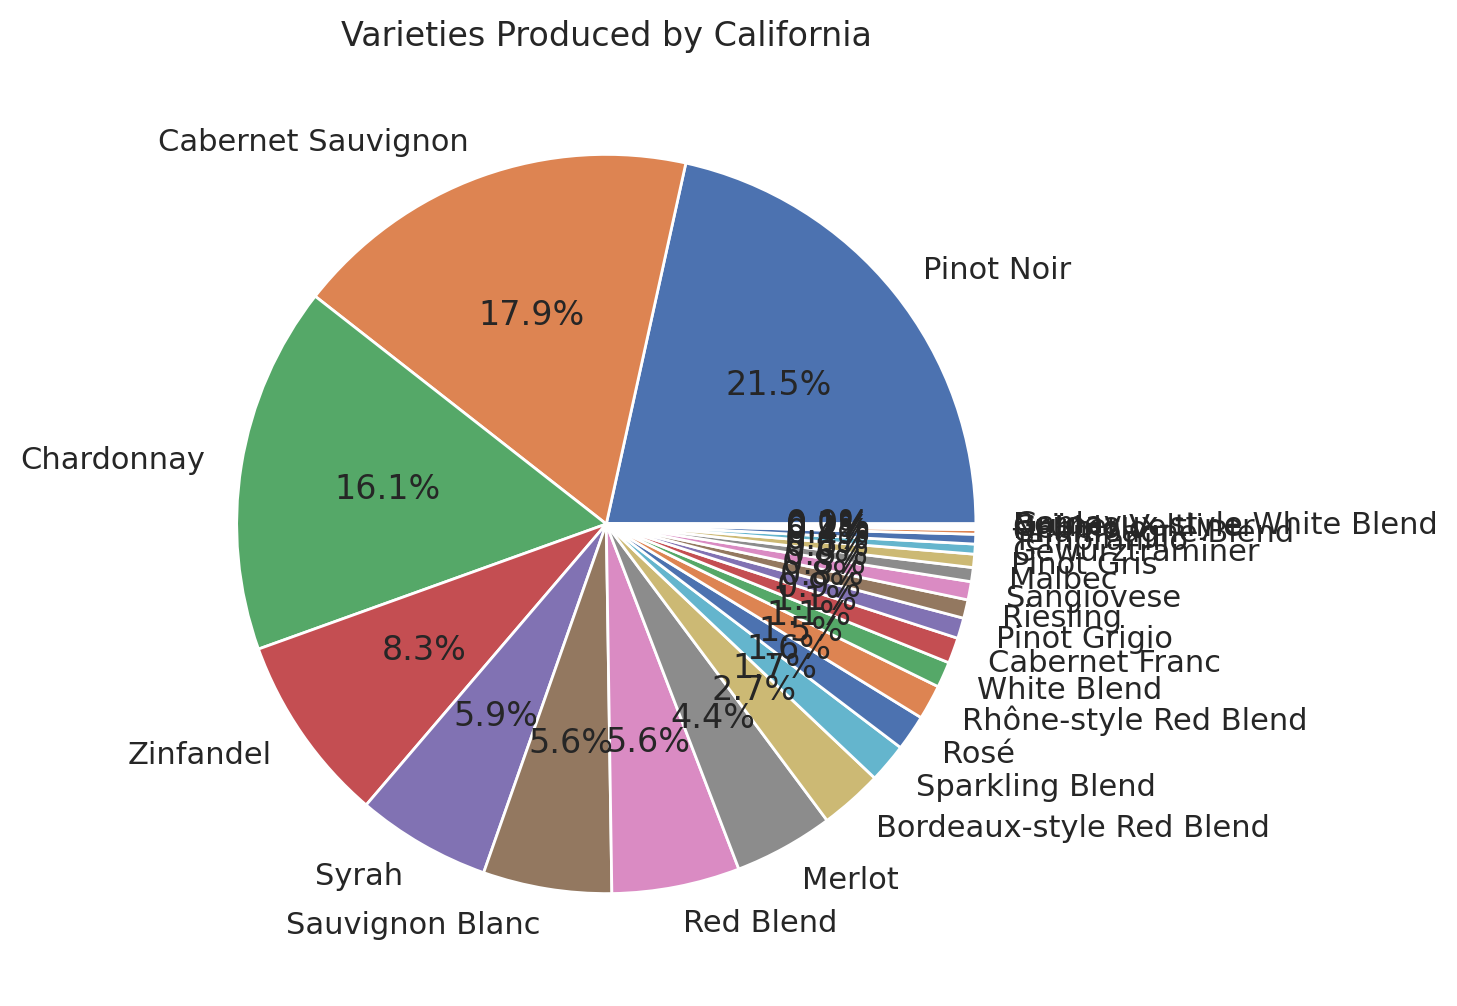

In [ ]:
california_df = df[df['province'] == 'California']
california_varieties = california_df['variety'].value_counts()
california_varieties.plot(kind='pie', autopct='%1.1f%%')
plt.title('Varieties Produced by California')
plt.ylabel('')
plt.show()

## **Region_1**

In [ ]:
print(df['region_1'].nunique())


1056


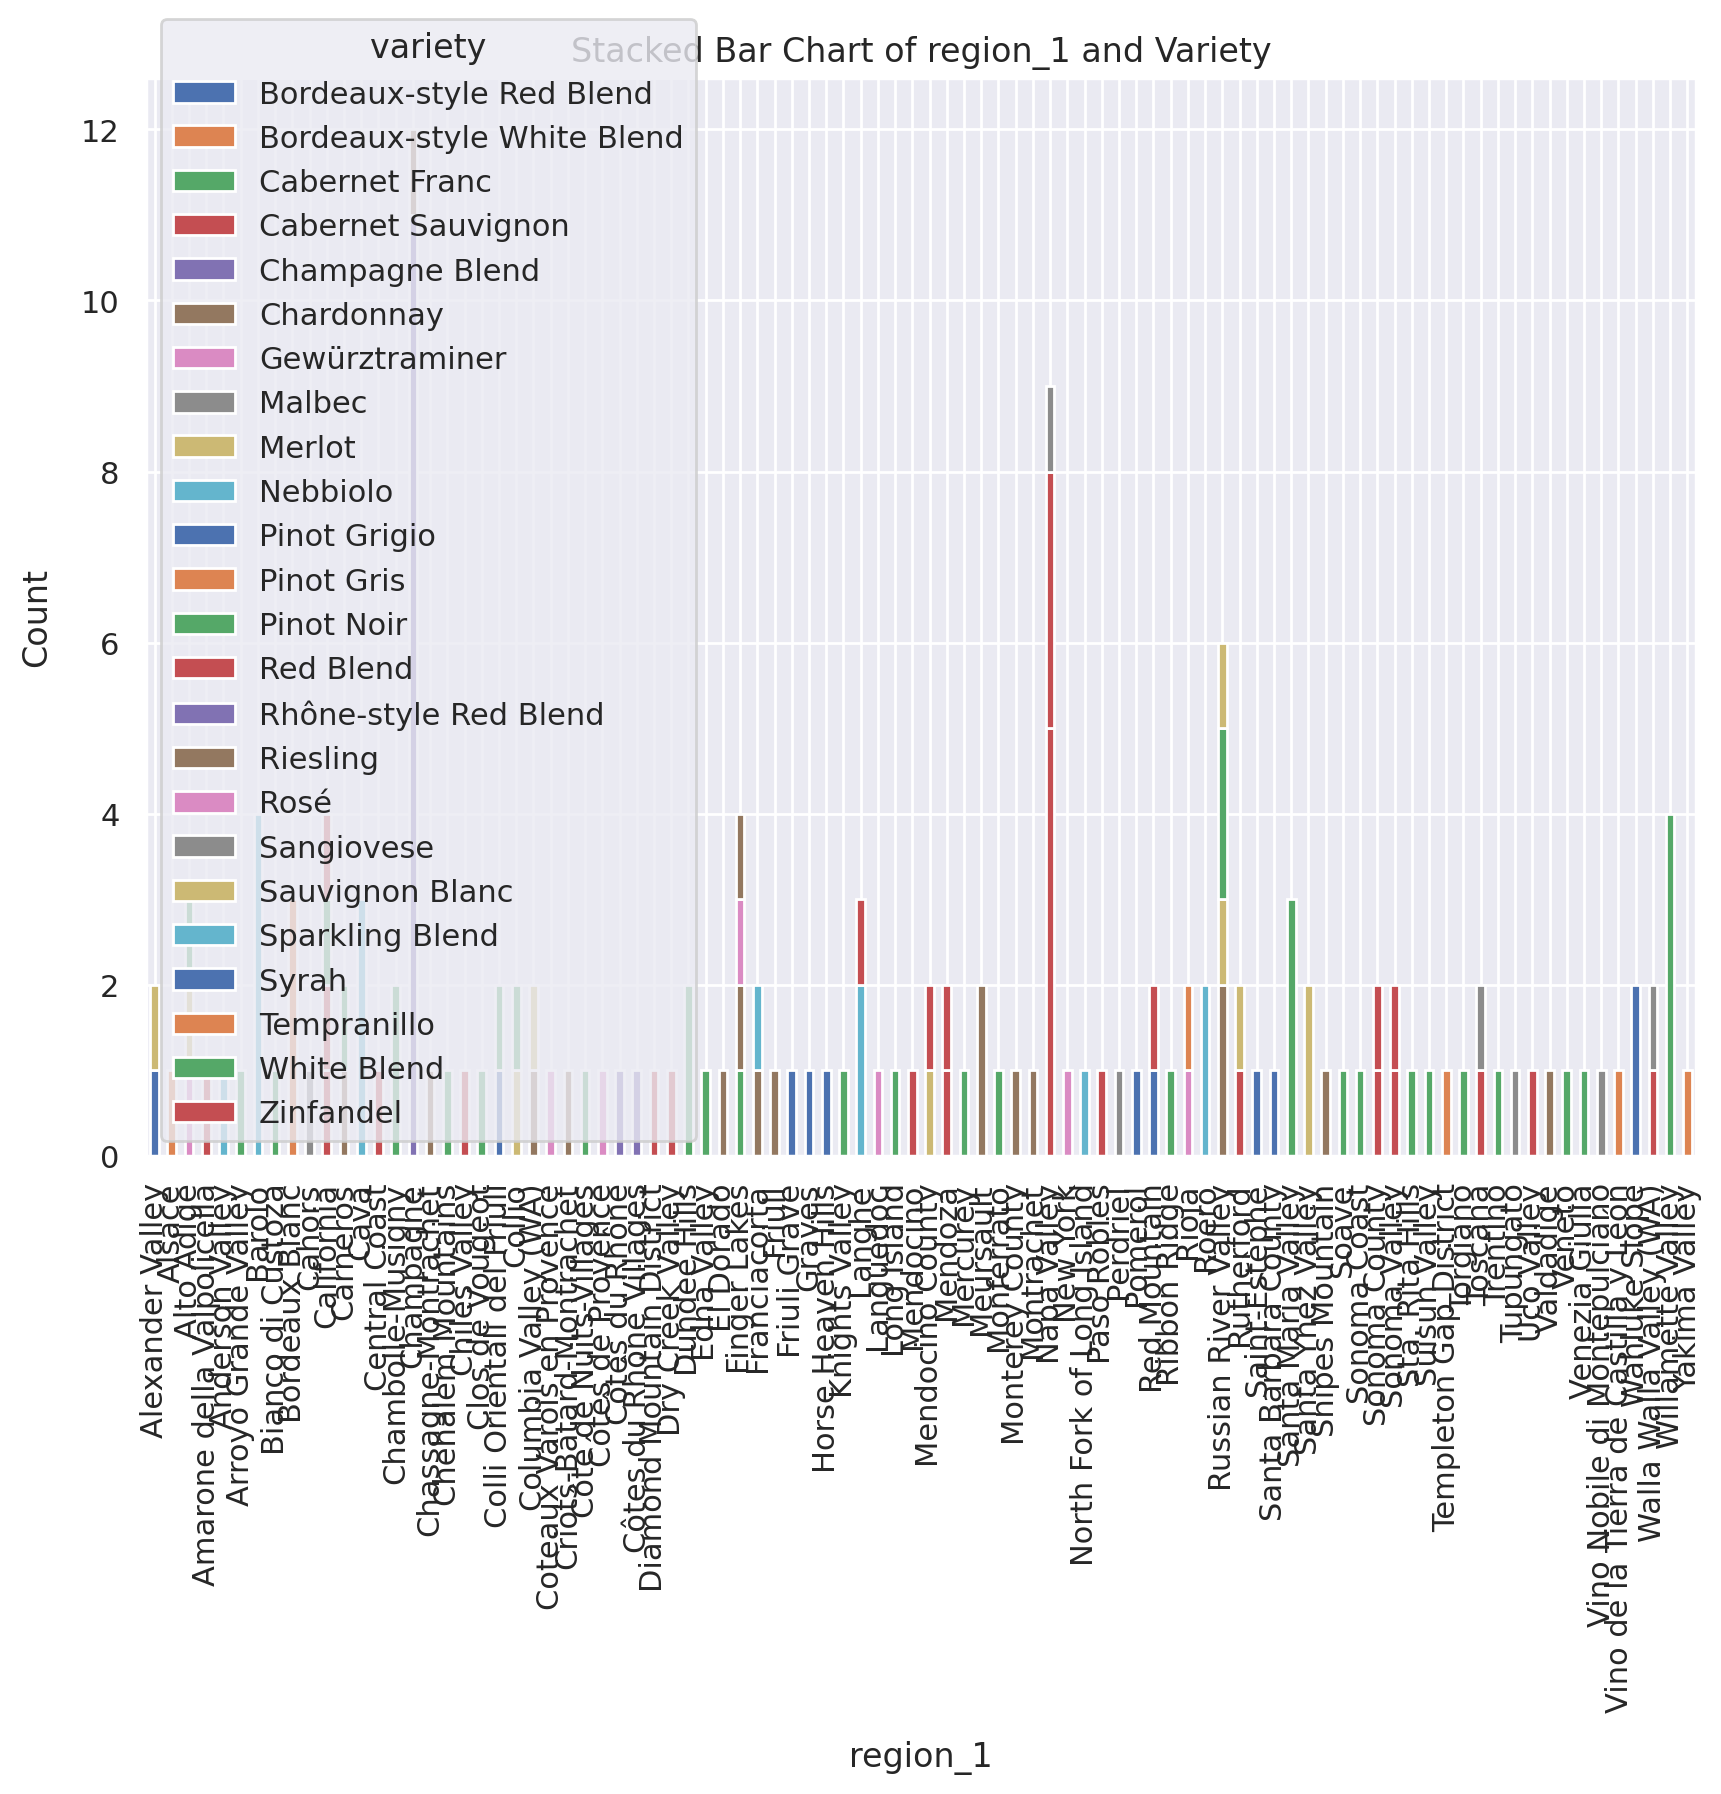

In [ ]:
ct = pd.crosstab(df['region_1'][200:400], df['variety'])

# Plot the stacked bar chart
ct.plot(kind='bar', stacked=True, figsize=(10, 7))

# Add labels and title
plt.xlabel('region_1')
plt.ylabel('Count')
plt.title('Stacked Bar Chart of region_1 and Variety')

# Display the plot
plt.show()

## **Winery**

In [ ]:
df['winery'].nunique()

14718

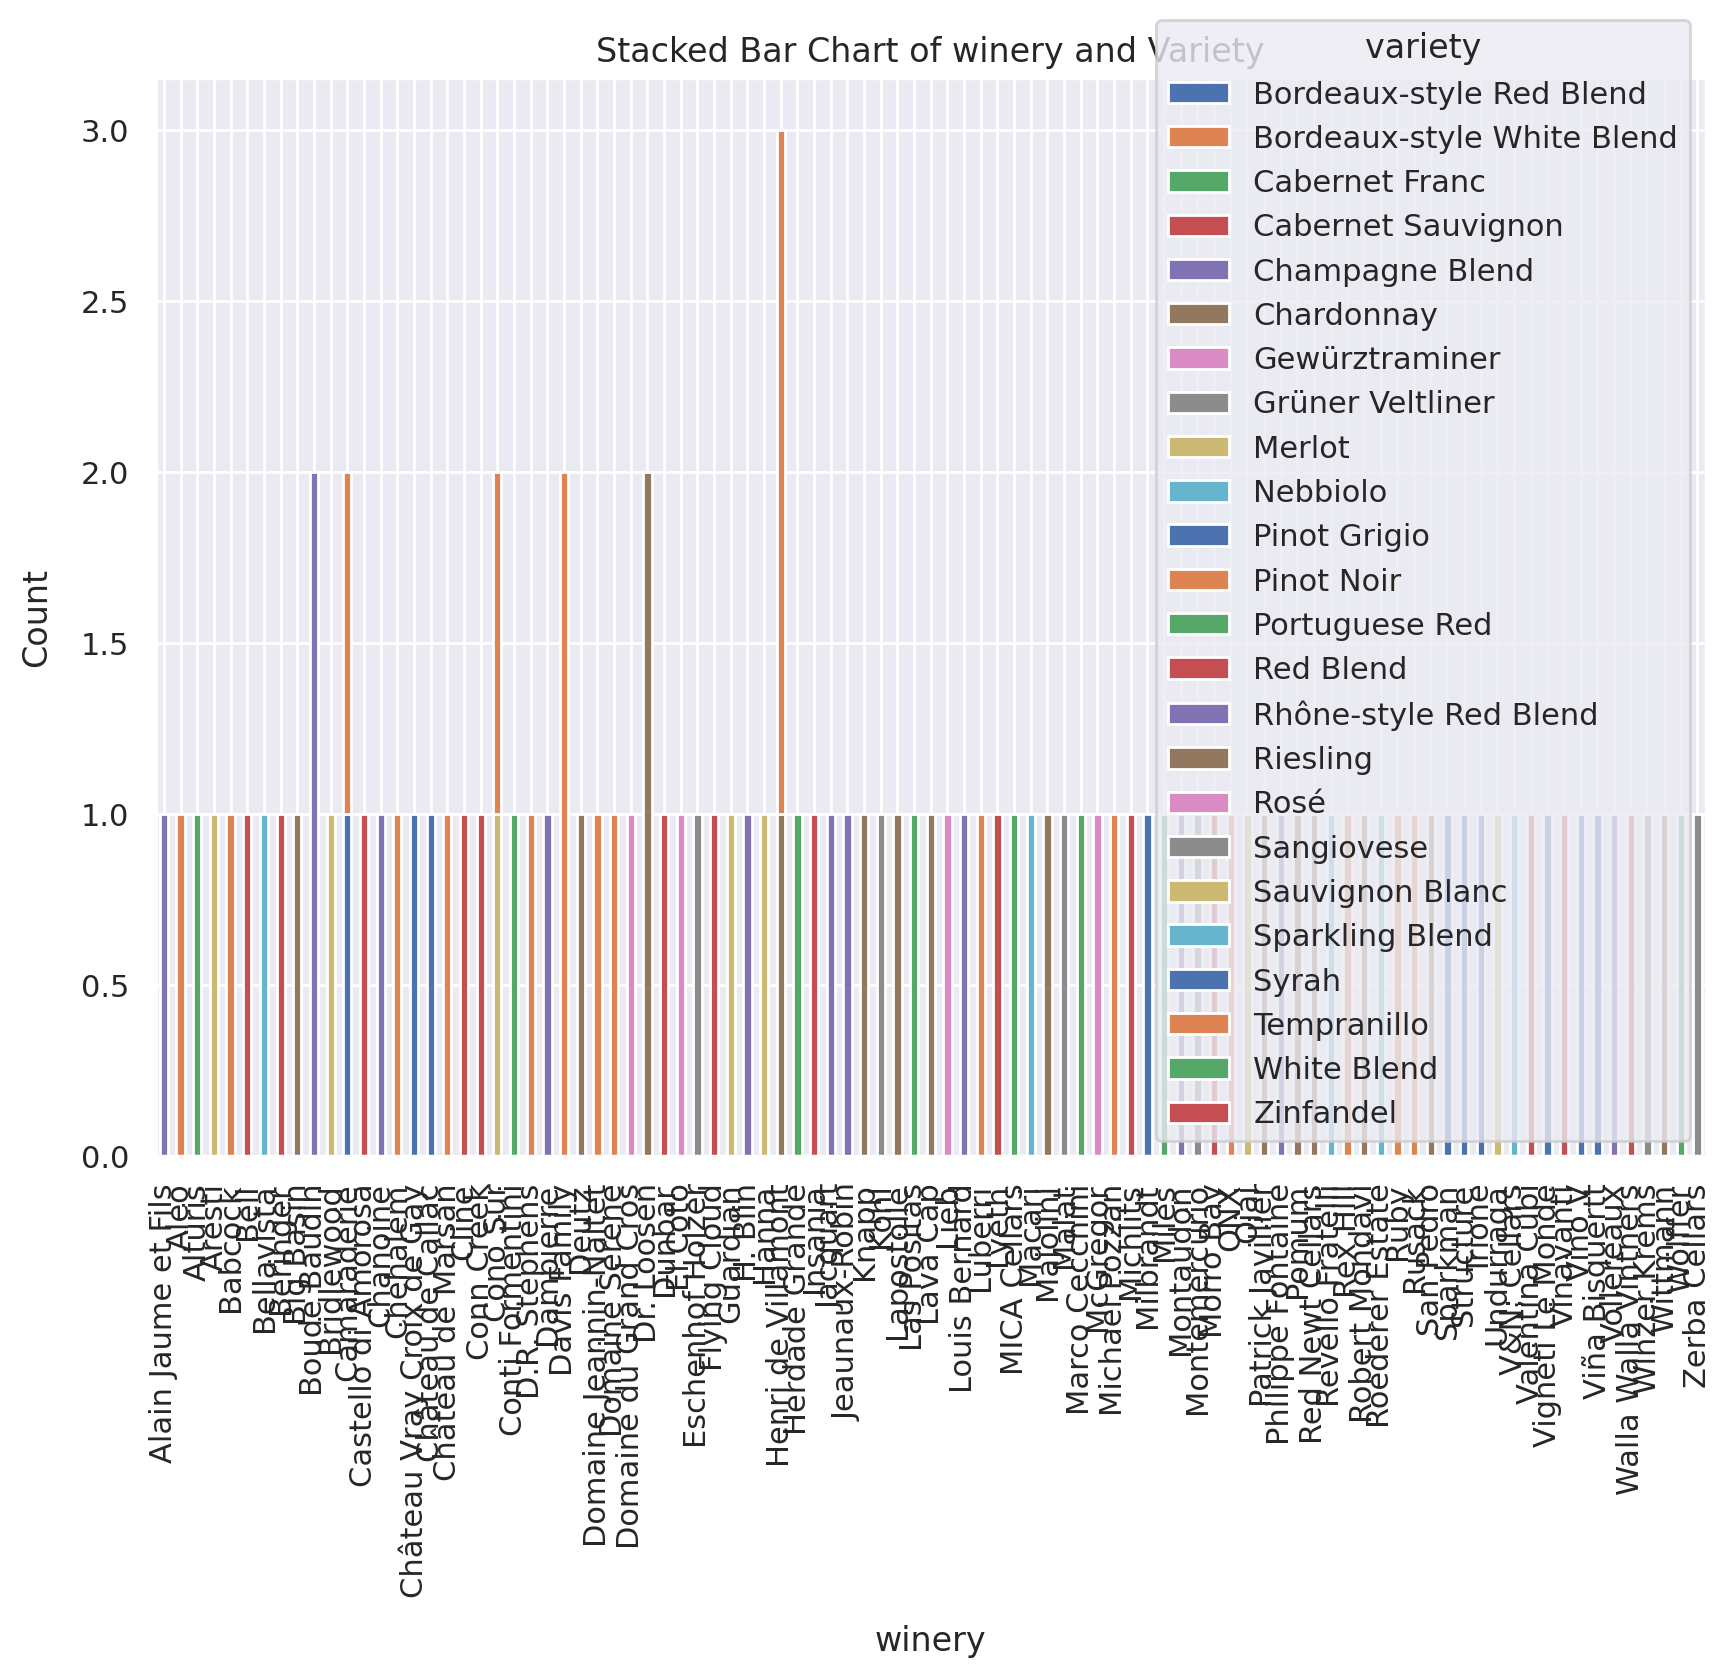

In [ ]:
ct = pd.crosstab(df['winery'][300:400], df['variety'])

# Plot the stacked bar chart
ct.plot(kind='bar', stacked=True, figsize=(10, 7))

# Add labels and title
plt.xlabel('winery')
plt.ylabel('Count')
plt.title('Stacked Bar Chart of winery and Variety')

# Display the plot
plt.show()

## **Designation**

In [ ]:
df['designation'].nunique()

30289

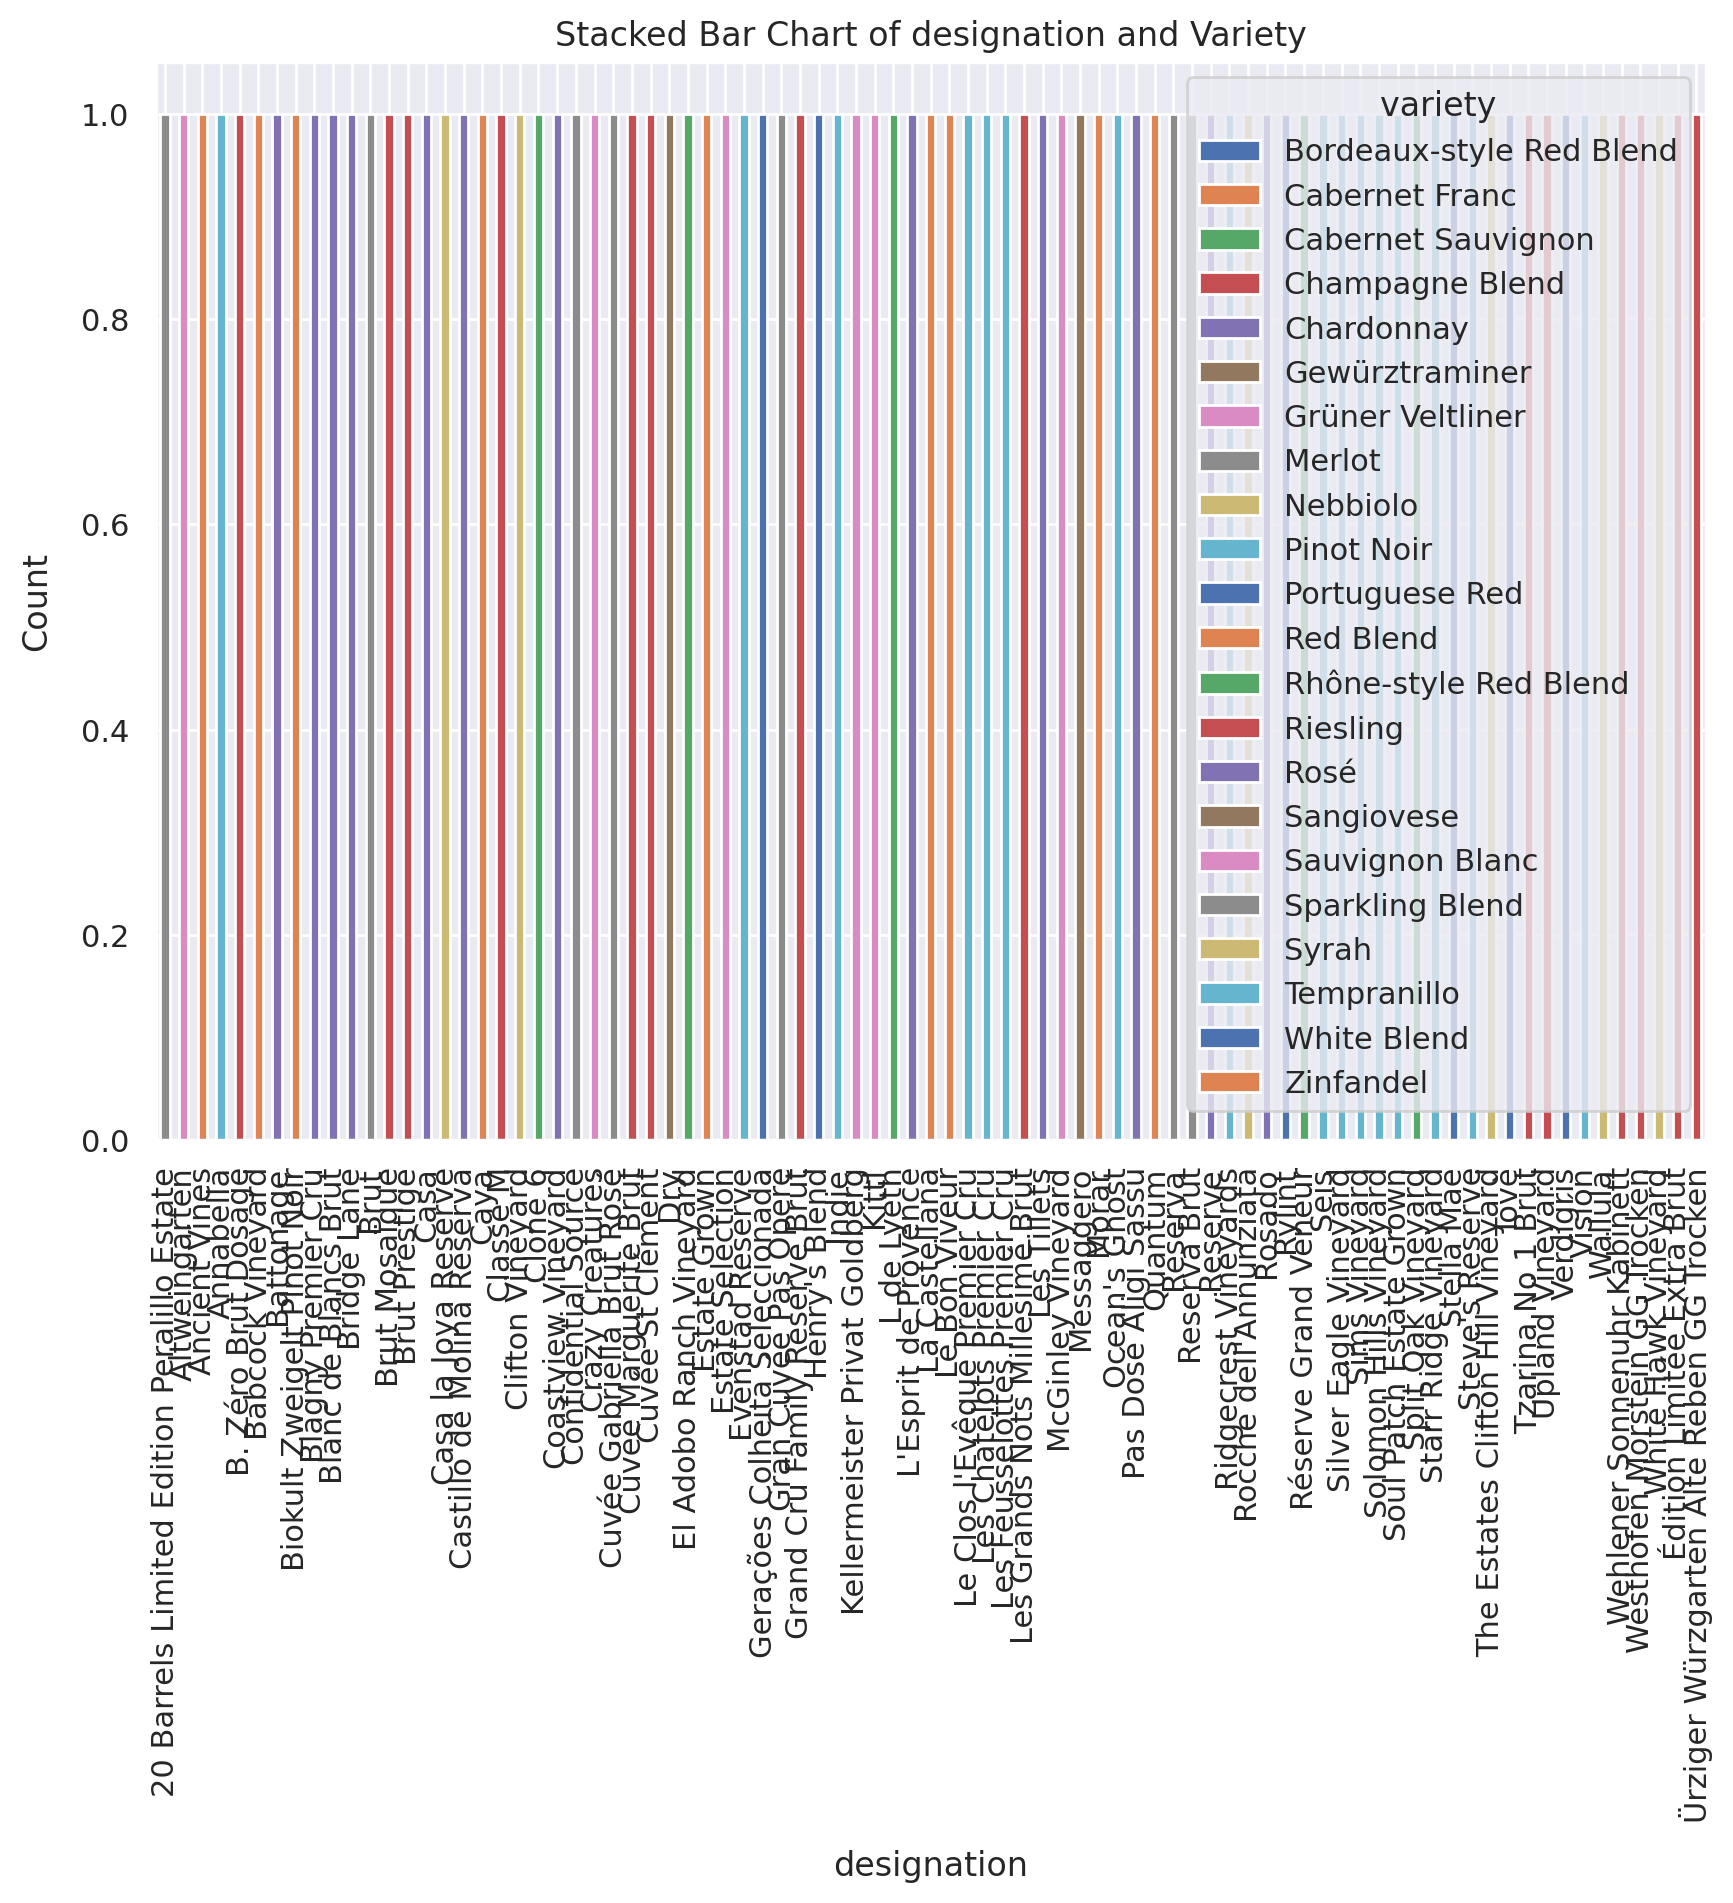

In [ ]:
ct = pd.crosstab(df['designation'][300:400], df['variety'])

# Plot the stacked bar chart
ct.plot(kind='bar', stacked=True, figsize=(10, 7))

# Add labels and title
plt.xlabel('designation')
plt.ylabel('Count')
plt.title('Stacked Bar Chart of designation and Variety')

# Display the plot
plt.show()

In [ ]:
df['designation'] = df['designation'].fillna(df['winery'])

**Each winery and designation produces a single variety of wine.**